<a href="https://colab.research.google.com/github/mehaksaini94/ML_regression_project-Rossmann_sales_prediction/blob/main/RossmannRetailSalesPrediction_Regression_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Retail Sales Prediction






##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project involves daily retail sales prediction for up to six weeks in advance of Rossmann stores. The Rossmann stores are drug stores spread out in 7 European countries and are over 3000 in number. The given dataset of 1115 Rossmann stores contains information about the different Rossmann stores, their types, the kinds of goods they sell, the no. of customers entering a given day, information about promotional offers, holidays, sales, etc for roughly 3 years i.e., from 2013-2015. By using different regression models, the forecasting of sales is done and the results are depicted.

# **GitHub Link -**

https://github.com/mehaksaini94/ML_regression_project-Rossmann_sales_prediction

# **Problem Statement**


Given a dataset containing sales and probable factors affecting sales of Rossmann stores, the business objective is to forecast the next six week's sales of Rossmann stores by analyzing it.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [94]:
#Import all the libraries

import pandas as pd #for data aggregation and manipulation
import numpy as np #for efficient numerical computations
import matplotlib.pyplot as plt #for data visualizations
import seaborn as sns #for data visualizations
import datetime #for calculating year, month, etc.
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

from scipy.stats import zscore #for handling outliers


%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
#install pycaret library
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 51.9 MB

In [1]:
#Import all from regression module of pycaret library for comparing various regression models.
from pycaret.regression import *

In [2]:
'''Install catboost library for performing catboost regression
CatBoost is a high-performance open-source library for gradient boosting on decision trees that
we can use for classification, regression and ranking tasks.'''
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.1 MB/s eta 0:00:00


In [3]:
import catboost as cb #import catboost library for catboost regression.

In [112]:
# Install the SHAP library using pip
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.9 MB/s eta 0:00:00


In [113]:
import shap
'''This line imports the SHAP library, which is used for explaining machine
 learning models' predictions. SHAP (SHapley Additive exPlanations) provides
  various methods for interpreting and visualizing model predictions by attributing
  the contribution of each feature to the final prediction'''

In [144]:
!pip install xgboost

In [145]:
import xgboost as xg

In [4]:
#Mount the google drive, in order to access the files here after accepting the authentication prompt.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [95]:
# Load the 2 files of the dataset
Rossmann_store_df = pd.read_csv("/content/drive/My Drive/AI learning!!/M6 AI/Projects/Data & Resources/store.csv")
Rossmann_sales_df = pd.read_csv("/content/drive/My Drive/AI learning!!/M6 AI/Projects/Data & Resources/Rossmann Stores Data.csv")

##**2. Data Analysis, Wrangling (Cleaning), Visualization of Rossman Dataset (i.e., Rossmann_sales_df):**

###**Dataset First View**

In [11]:
# Dataset First Look
print('The first 5 rows of the dataset are: \n')
Rossmann_sales_df.head() # To view the first 5 rows.

The first 5 rows of the dataset are: 



Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [12]:
print('The last 5 rows of the dataset are: \n')
Rossmann_sales_df.tail() # To view the last 5 rows

The last 5 rows of the dataset are: 



Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
Rossmann_sales_df.shape

(1017209, 9)

### Dataset Information

In [14]:
# Dataset Info
Rossmann_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
len(Rossmann_sales_df[Rossmann_sales_df.duplicated()])

0

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
Rossmann_sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### What did you know about your dataset?

Inferences:


*  No. of features =9
* No. of data ponits =1017209.
* There are no null values.
* There are no duplicate values.

## ***Understanding Your Variables***

In [17]:
# Dataset Columns
print('Information on what the columns represent:')
Rossmann_sales_df.columns

Information on what the columns represent:


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [18]:
# Dataset Describe
print('************ Basic information about the dataset and about data types of the features ***************')
Rossmann_sales_df.describe()

************ Basic information about the dataset and about data types of the features ***************


Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

**Inference:**

**Count:** Total no. of values (non-null/NA) present in corresponding columns. Since count is equal to the total no. of rows for all the columns, there are zero non-null values present in the dataset. Hence, there is no need of data preprocessing (cleaning) of null values.

**Mean:** Mean of all values present in the corresponding columns.

**Std:** Standard Deviation of the values present in the corresponding columns.

**Min:** Minimum value in the corresponding column.

**25%:** The 25th percentile value.

**50%:** The 50th percentile value.

**75%:** The 75th percentile value.

**Max:** Maximum value in the corresponding column.

### **Variables Description**

##**Data Dictionary-**
This dataframe  has the following data fields (variables):

**Dependent variables:**

*   **Store-** It denotes a unique Id for each store.
*   **DayOfWeek-** It represents the day of the week for which sales data is shown.
* **Date-** It denotes the date on which the sale occurred.
* **Customers-** It represents the the number of customers on a given day.
* **Open-** It denotes whether the store is open or not.
* **Promo-** This variable indicates whether a store is running a promo on that day or not.
* **StateHoliday-**  It indicates the presence of a state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None). Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends.
* **SchoolHoliday-** It  indicates if the (Store, Date) was affected by the closure of public schools.


**Independent variable:**
* **Sales-** It represents the turnover for any given day (which is to be predicted).





### Check Unique Values for each variable.

In [19]:
#Function definition for printing unqiue values of all the features of the dataset.
def print_unique_values(dataframe):
    '''
    This function prints the unique values, count of the different unique values and total no.
    of unique values
    I/P args: Pandas dataframe
    O/P args: none
    '''
    for column in dataframe.columns:
        unique_values_count = dataframe[column].value_counts()
        unique_values = unique_values_count.index.tolist()
        num_unique_values = len(unique_values)
        print(f"Unique values of '{column}': {unique_values} (Total: {num_unique_values})")
        print("Value Counts:")
        print(unique_values_count)
        print("\n")

In [20]:
# Check Unique Values for each variable.
# Call the function
print_unique_values(Rossmann_sales_df)

Unique values of 'Store': [1, 726, 708, 709, 713, 714, 715, 717, 718, 720, 721, 722, 723, 724, 725, 727, 705, 728, 729, 730, 731, 732, 733, 734, 735, 737, 738, 740, 741, 742, 707, 704, 665, 685, 667, 668, 672, 673, 674, 675, 676, 678, 679, 680, 681, 682, 683, 686, 703, 687, 688, 689, 690, 691, 692, 693, 695, 696, 697, 698, 699, 700, 743, 745, 746, 798, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 799, 747, 800, 801, 802, 803, 807, 808, 809, 810, 811, 812, 813, 814, 816, 783, 782, 781, 780, 748, 749, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 767, 768, 769, 770, 772, 773, 774, 776, 777, 779, 666, 664, 818, 566, 552, 553, 554, 556, 557, 2, 559, 560, 561, 562, 563, 564, 565, 567, 550, 568, 569, 570, 572, 574, 576, 577, 578, 579, 580, 581, 582, 583, 551, 549, 663, 528, 511, 513, 515, 516, 517, 519, 520, 521, 523, 524, 525, 526, 527, 529, 548, 530, 531, 532, 533, 535, 536, 537, 538, 541, 543, 544, 545, 546, 584, 585, 586, 645, 626, 627, 62

Inference:


*   In the 'StateHoliday' feature, there is redundancy in 0 and '0' data points which need to merged in data wrangling.



##***Data Wrangling***

### Data Wrangling Code

In [21]:
# Handle merging of 0 and '0' values of StateHoliday Column

# Replace '0' with 0 in the 'StateHoliday' column
Rossmann_sales_df['StateHoliday'] = Rossmann_sales_df['StateHoliday'].replace('0', 0)

Rossmann_sales_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [22]:
#Transform the variable StateHoliday
Rossmann_sales_df["StateHoliday"] = Rossmann_sales_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [23]:
Rossmann_sales_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [24]:
#Find out the time duration for which data is given.
print(Rossmann_sales_df['Date'].min(),'initial')
print(Rossmann_sales_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


Inference:


*   This tells us we have a data of roughly 3 years.


#### Feature Manipulation

In [25]:
# Extract year, month, day and week of year from "Date"

Rossmann_sales_df['Date']=pd.to_datetime(Rossmann_sales_df['Date']) #Convert data type of Date from object to datetime.
Rossmann_sales_df['Year'] = Rossmann_sales_df['Date'].apply(lambda x: x.year)
Rossmann_sales_df['Month'] = Rossmann_sales_df['Date'].apply(lambda x: x.month)
Rossmann_sales_df['Day'] = Rossmann_sales_df['Date'].apply(lambda x: x.day)
Rossmann_sales_df['WeekOfYear'] = Rossmann_sales_df['Date'].apply(lambda x: x.weekofyear)

In [26]:
Rossmann_sales_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
'''This is done to sort the DataFrame Rossmann_sales_df first by the 'Date' column in descending order and then by the 'Store' column in ascending order.
 The sorting is applied directly to the original DataFrame due to inplace=True
'''
Rossmann_sales_df.head() #To view the first five entries of the dataset after manipulations.

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  
0              1  2015      7   31          31  
1              1  2015      7   31          31  
2              1  2015      7   31          31  
3              1  2015      7   31          31  
4              1  2015      7   31          31

### Manipulations done and insights found:

The following manipulations have been done:


*   For the feature 'StateHoliday', there was redundancy in grouping of data as 0 and '0' were two categories but were implying the same thing. Hence, they were merged.
*   Also, in the 'StateHoliday' feature, it was found logical to categorize into two categories only i.e., whether there was a state holiday or not.
* Conversion of Date feature into datetime is done in order to extract year, day, month and week features.

The following inference can be deduced:


*   The dataset contains data of sales for 3 years approximately (2.7 years precisely).








##**Univariate Analysis:**


**Chart : Frequency distribution of all the features.**

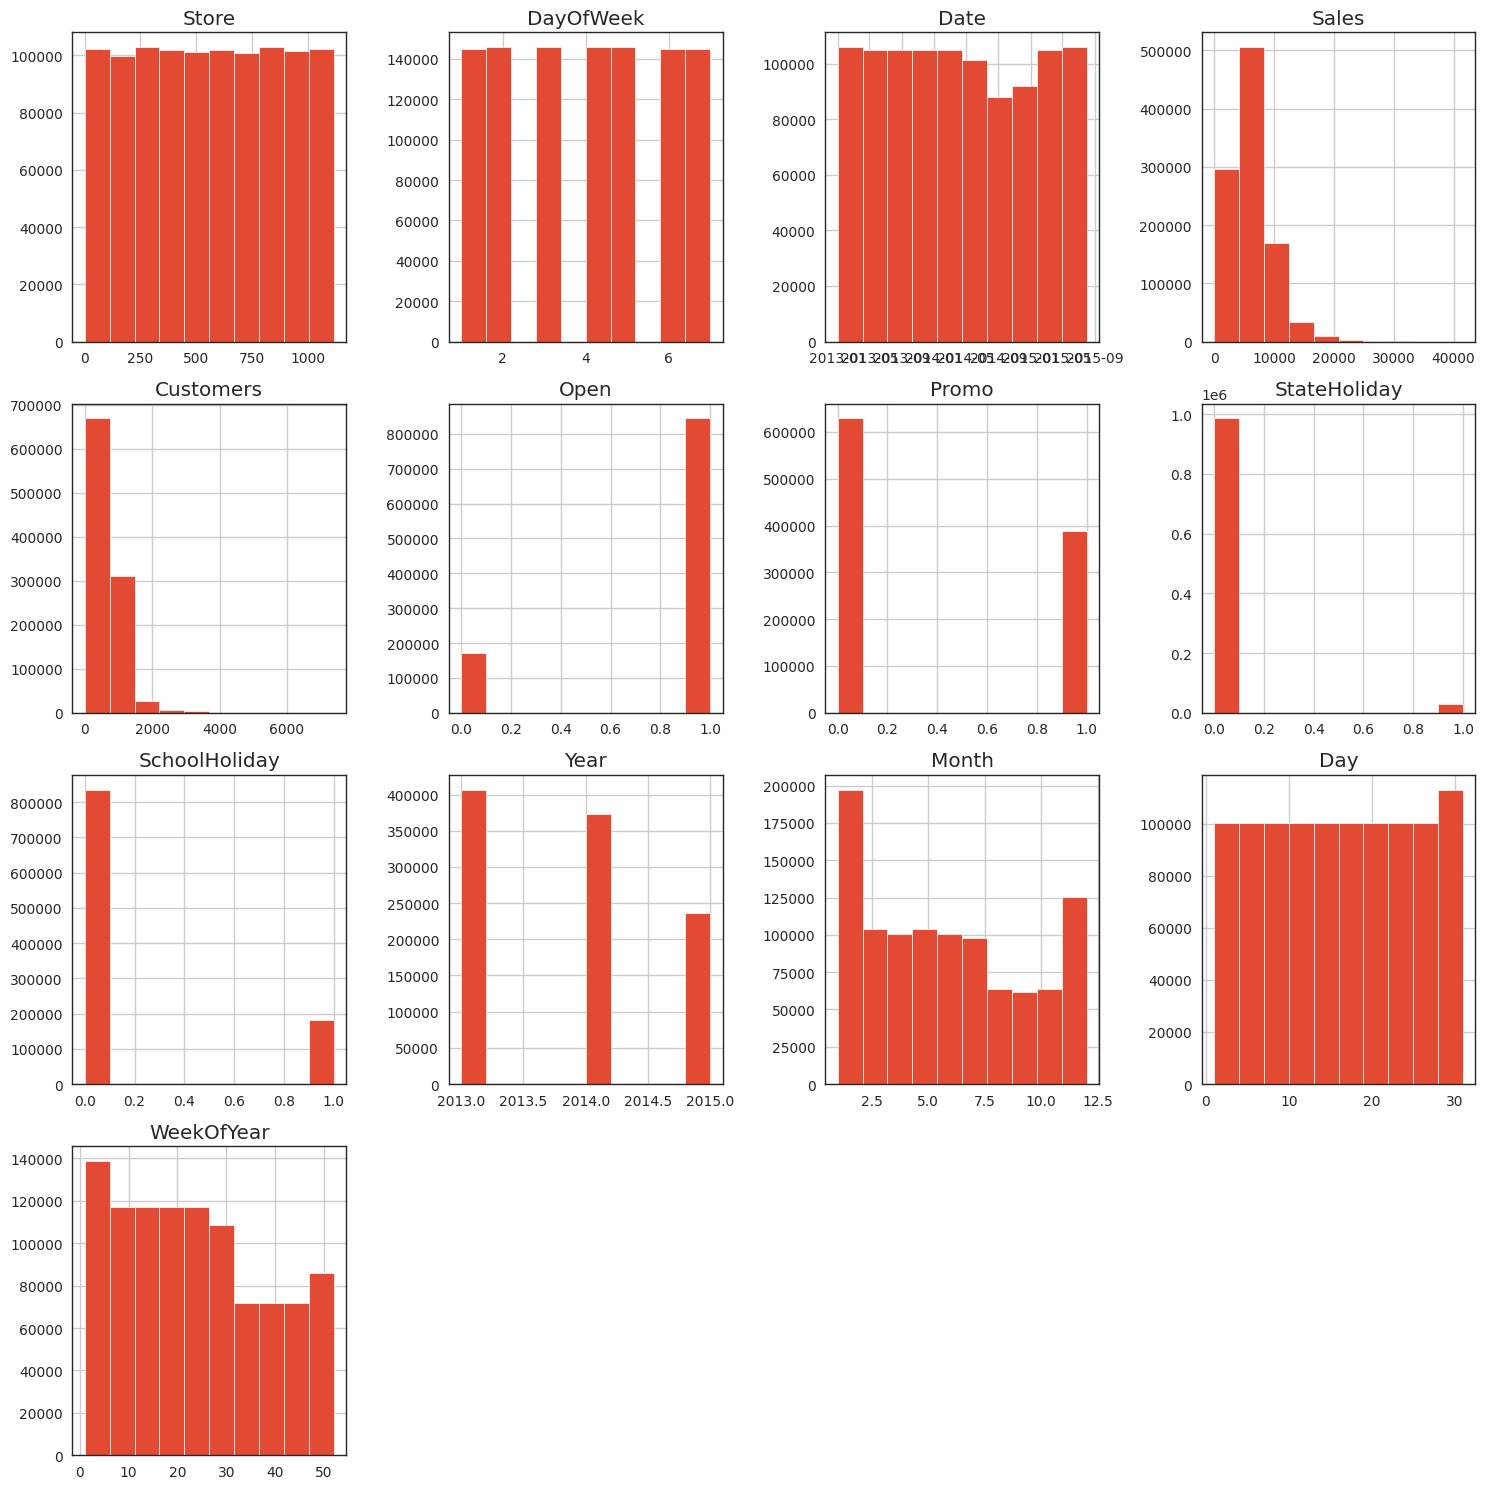

In [27]:
# Chart 1: Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15)) #To create a 15 inch x 15 inch plot
pd.DataFrame.hist(Rossmann_sales_df,ax=ax) #To make a histogram of all columns of the Pandas dataframe.
plt.tight_layout();

Reason for choosing histograms:

Histograms are useful graphs for representing the numerical distribution of data. Hence, histograms of all the features of the dataset are drawn to get an idea of the values that the different features take.

Inferences:


* The above graph shows the counts of all the unique values of all the features in the dataset.
* Most of the times the store is open.
* There are very few school holidays and even fewer state holidays.

##**Bivariate Analysis:**


**Chart- Plot between Sales and Customer**

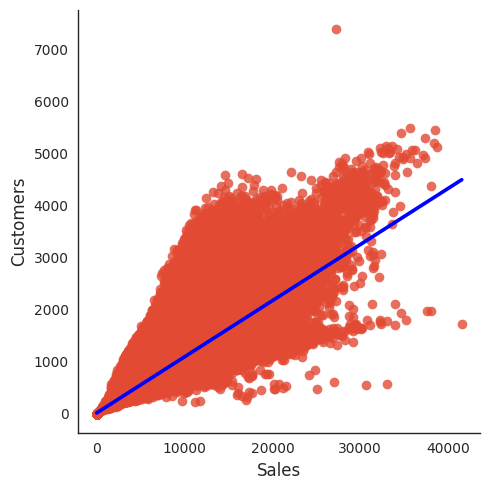

In [28]:
#linear relation between Sales and Customers
sns.lmplot(x= 'Sales' , y ='Customers',data=Rossmann_sales_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

Reason for choosing seaborn's lmplot:

It is a combination of scatter plot and regression line. A regression line denotes a single line that best fits the data in such a way that the distance between the points and the line is the least.



Inference:


*   There is a linear relation between Sales and Customers (which is quite obvious becuase more customers would imply more sales).

Will the gained insights help in creating a positive business impact?


*   More customers will imply more sales.



**Chart- Plot between Open (opening of store) and day of the week**

<Axes: xlabel='DayOfWeek', ylabel='count'>

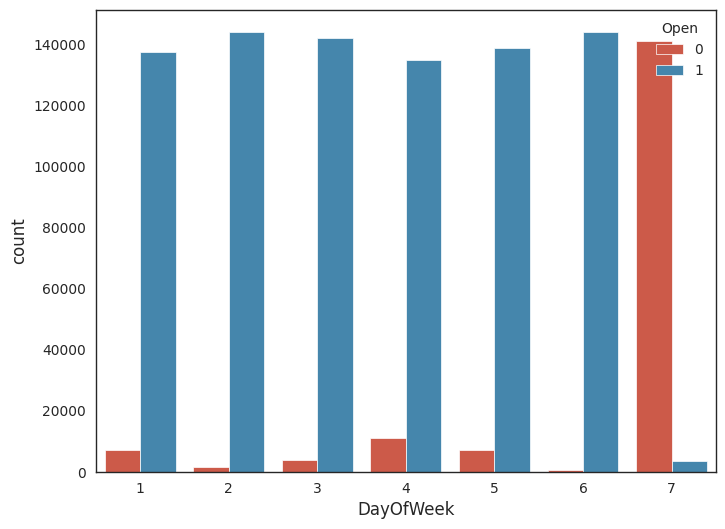

In [29]:
sns.countplot(x='DayOfWeek',hue='Open',data=Rossmann_sales_df)

Reason for choosing countplot:


*   Countplot is chosen here since it measures the count or occurrences of data points which are present in the categorical variable.



Inference:


*   Store remains closed on Sunday the most.



Will the gained insights help in creating a positive business impact?

By opening the store on Sunday, the sales can be increased.

**Chart- Plot between Sales and Promo**

<Axes: xlabel='Promo', ylabel='Sales'>

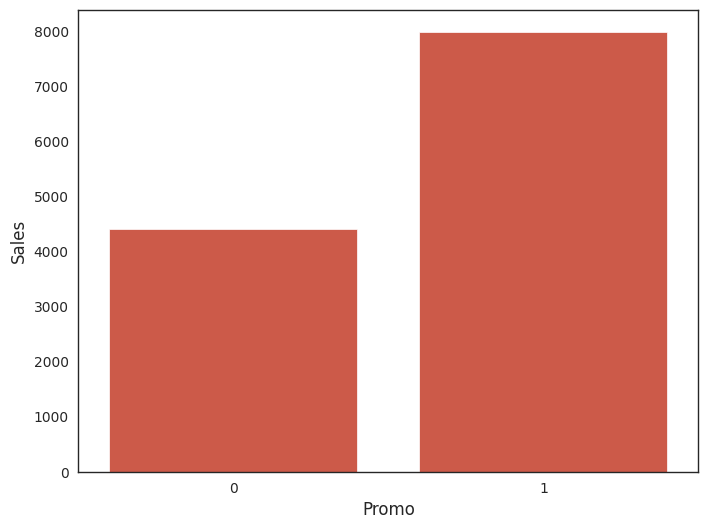

In [30]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(Rossmann_sales_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

Reason for choosing barplot:

Bar plot is chosen here as it helps to convey information quickly in a visual manner.

Inference:


*   There is a roughly 2 times increase in sales when Promo is done.



Will the gained insights help in creating a positive business impact?

The above graph implies that by including more such the promotional offer, there should be an increase in sales.

**Chart- Plot between Months and Sales**

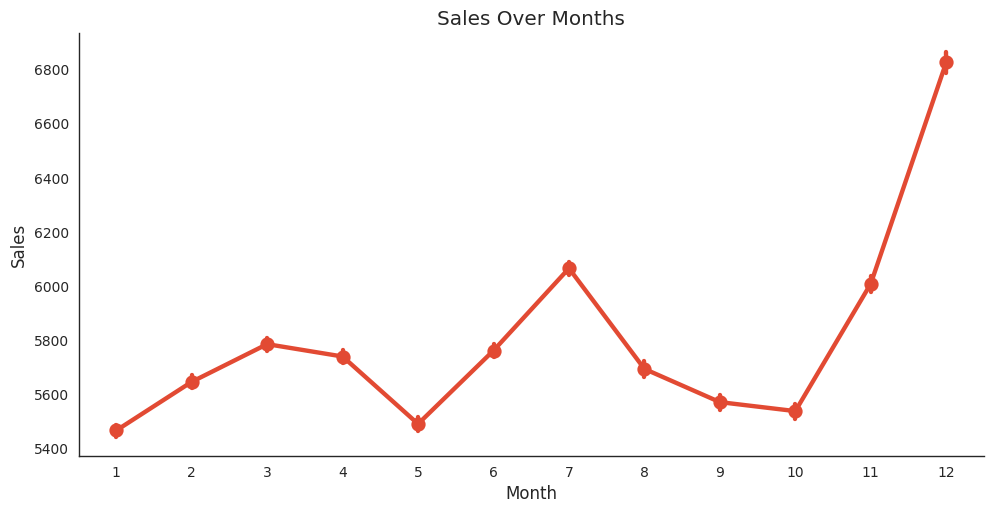

In [31]:
# Create the catplot
sns.catplot(x='Month', y='Sales', data=Rossmann_sales_df, kind='point', aspect=2)

# Set labels and title
plt.title('Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')

# Show the plot
plt.show()

Reason for choosing catplot:

Catplot is used here as it is used to plot categorical plots.

Inference:


*   Sale is maximun in the months of December and November (due to christmas), followed by July and March. Sales is least in January, May and October.



Will the gained insights help in creating a positive business impact?

*   Sales are maximum in December for all the years and thus, appropriate stocking of products should be done in advance at all stores.
*   For months in which sales are less, promotional offers can be introduced.




**Chart- Pie chart depicting the effect of school holidays on Sales**

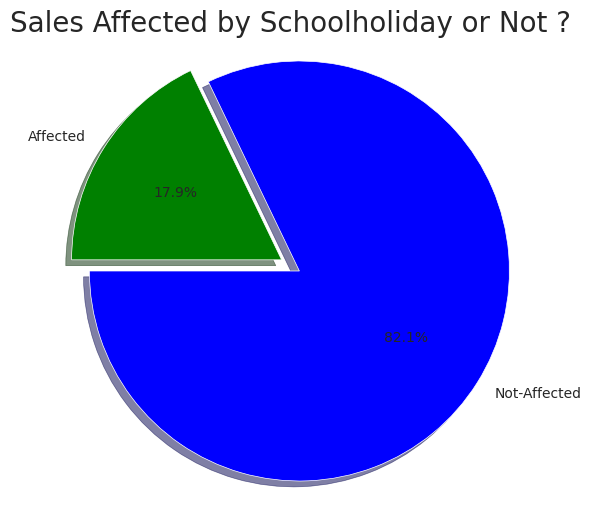

In [32]:
# Define labels for the pie chart segments
labels = 'Not-Affected' , 'Affected'
# Count the occurrences of each category in the 'SchoolHoliday' column of the DataFrame
sizes = Rossmann_sales_df.SchoolHoliday.value_counts()
# Define colors for the pie chart segments
colors = ['blue', 'green']
# Define how much each segment should be exploded out from the center
explode = (0.1, 0.0)
# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
# Set the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')
# Set the title of the pie chart
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
# Show the plot
plt.plot()
# Get the current figure and set its size
fig=plt.gcf()
fig.set_size_inches(6,6)
# Display the plot
plt.show()

Reason for choosing pie chart:

The pie-chart is chosen as it shows the how much percentge of affected and non-affected customers are distributed in the entire dataset in an easy to understand plot.

Inference:


*   Majority of sales (i.e., 82.1%) are not affected by school holidays.



Will the gained insights help in creating a positive business impact?

Schoolholidays have roughly 18% effect on sales and it is not that much. It can be analysed.

**Chart- Pie chart depicting effect of state holidays on sales**

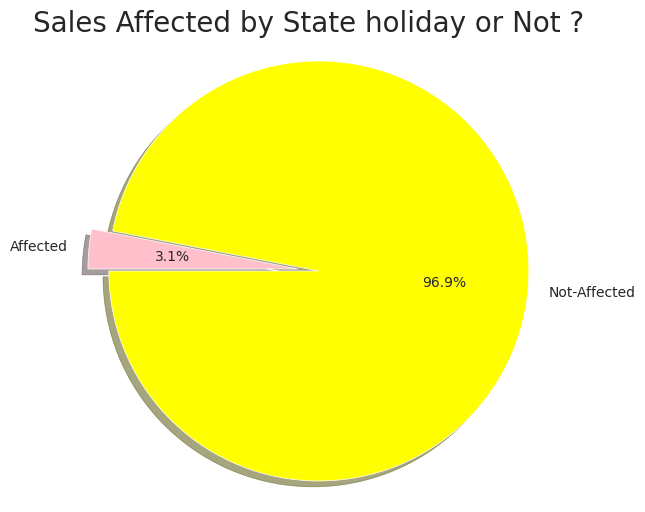

In [33]:
# Define labels for the pie chart segments
labels = 'Not-Affected' , 'Affected'
# Count the occurrences of each category in the 'StateHoliday' column of the DataFrame
sizes = Rossmann_sales_df.StateHoliday.value_counts()
# Define colors for the pie chart segments
colors = ['yellow','pink']
# Define how much each segment should be exploded out from the center
explode = (0.1, 0.0)
# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
# Set the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')
# Set the title of the pie chart
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
# Display the plot
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Reason for choosing pie chart:

The pie-chart is chosen as it shows the how much percentge of affected and non-affected customers are distributed in the entire dataset in an easy to understand plot.


Inference:

Only 3.1% of sales is affected by state holiday.

Will the gained insights help in creating a positive business impact?

Since sales is not much affected by StateHoliday, it is an irrelevant feature for sales prediction and hence can be removed.

In [34]:
#Drop the StateHoliday feature.
Rossmann_sales_df.drop('StateHoliday',inplace=True,axis=1)

**Chart- Sales v/s Years**

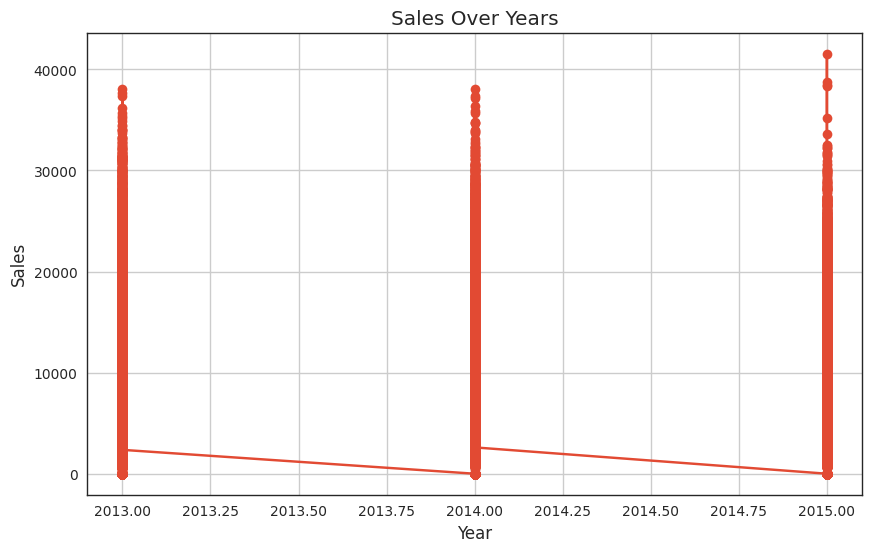

In [35]:
#Plot showing sales in different years
plt.figure(figsize=(10, 6)) #To create a new figure with a specific size (width: 10 inches, height: 6 inches)
# To plot the sales data against the years with markers for each data point and a solid line connecting them
plt.plot(Rossmann_sales_df['Year'], Rossmann_sales_df['Sales'], marker='o', linestyle='-')
plt.title('Sales Over Years') # To add a title to the plot
plt.xlabel('Year') # To label the x-axis
plt.ylabel('Sales') # To label the y-axis
plt.grid(True) # To display gridlines on the plot
plt.show() # To show the plot


Reasons for choosing line plot (graph):



*   The plot provides a clear visual representation of how sales have evolved over time. By plotting sales against years, it becomes easy to identify any patterns, trends, or fluctuations in sales data.
*   The chart helps in analyzing the sales data as a time series. Time series analysis is crucial for understanding how sales behave over different periods, which can provide insights into seasonal trends, long-term growth, or decline.
* The markers (points) on the line plot signify individual data points, allowing viewers to identify any specific years with notable sales figures. The line connecting these points helps in observing the overall trend or trajectory of sales over the years.



Inference:
There is not much difference between the sales in the three years.

Will the gained insights help in creating a positive business impact?

There isn't any major change in sales for the three years and hence there is no need for further analysing any difference in methods of sales for the three years separately.

##**Multivariate Analysis:**


**Chart: Heatmap of Rossmann Dataset:**

In [36]:
#Define a function to create a heatmap
def create_heatmap(dataframe, figsize=(9, 9), vmax=0.7, square=True, annot=True, cmap='viridis'):
    """
    Function to create a heatmap of correlation matrix for a given DataFrame.

    I/P args:
        dataframe: pandas DataFrame
            The DataFrame for which the correlation matrix will be calculated and plotted.
        figsize: tuple, optional
            Size of the figure (width, height) in inches. Default is (9, 9).
        vmax: float, optional
            Maximum value for color mapping. Default is 0.7.
        square: bool, optional
            If True, make the heatmap square. Default is True.
        annot: bool, optional
            If True, annotate each cell with the correlation value. Default is True.
        cmap: str or Colormap, optional
            The mapping from data values to color space. Default is 'viridis'.

    O/P args: None (Displays the heatmap).
    """
    # Calculate correlation matrix
    correlation_map = dataframe.corr()

    # Convert the correlation map to a numpy array
    obj = np.array(correlation_map)

    # Set the lower triangle of the correlation matrix to False to hide redundant correlations
    obj[np.tril_indices_from(obj)] = False

    # Create a new figure and axis for the heatmap
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)

    # Create heatmap using seaborn
    sns.heatmap(correlation_map, mask=obj, vmax=vmax, square=square, annot=annot, cmap=cmap)

    # Display the heatmap
    plt.show()

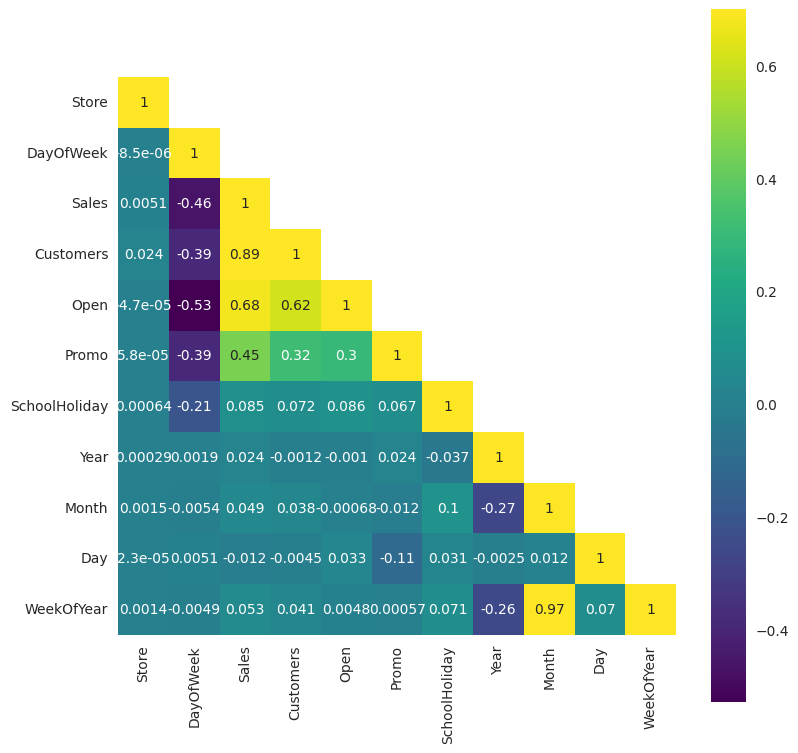

In [37]:
# Call function for displaying heatmap
create_heatmap(Rossmann_sales_df)

Reasons for choosing heatmap:


*   A heatmap is selected here to visualize the correlation matrix of the dataset Rossmann_sales_df.
*   Heatmaps are particularly effective for displaying correlations because they use color gradients to represent the strength and direction of the relationships between variables.


Inferences:


*   There is a high correlation (of 0.89) between Sales and Customers which is quite obvious since more customers imply more sales.
*   There is a moderate correlation of 0.68 between Sales and if the store is Open (which is quite obvious too). Also, there is a high correlation between Month and WeekofYear (0.97) and a moderate correlation of 0.62 between Customers and Open. These are quite ovious as there will be more sales if the store is open and customer comes and as such these correlation don't provide much information.
* There is a moderate correlation between Sales and Promo (of 0.45).



Will the gained insights help in creating a positive business impact?


*   Sales has a moderately positive correlation with Promo which means that the promotional offer is quite helpful in boosting of sales. It implies that such types of promotional offers should be freuently done to attract customers.





##**3. Data Analysis, Wrangling (Cleaning), Visualization of Stores Dataset (i.e., Rossmann_store_df):**

### **Dataset First View**

In [38]:
# Dataset First Look
print('The first 5 rows of the dataset are: \n')
Rossmann_store_df.head() # To view the first 5 rows.

The first 5 rows of the dataset are: 



Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [39]:
print('The last 5 rows of the dataset are: \n')
Rossmann_store_df.tail() # To view the last 5 rows

The last 5 rows of the dataset are: 



Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

### Dataset Rows & Columns count

In [40]:
Rossmann_store_df.shape

(1115, 10)

### Dataset Information

In [41]:
# Dataset Info
Rossmann_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [42]:
# Dataset Duplicate Value Count
len(Rossmann_store_df[Rossmann_store_df.duplicated()])

0

#### Missing Values/Null Values

In [43]:
# Missing Values/Null Values Count
Rossmann_store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

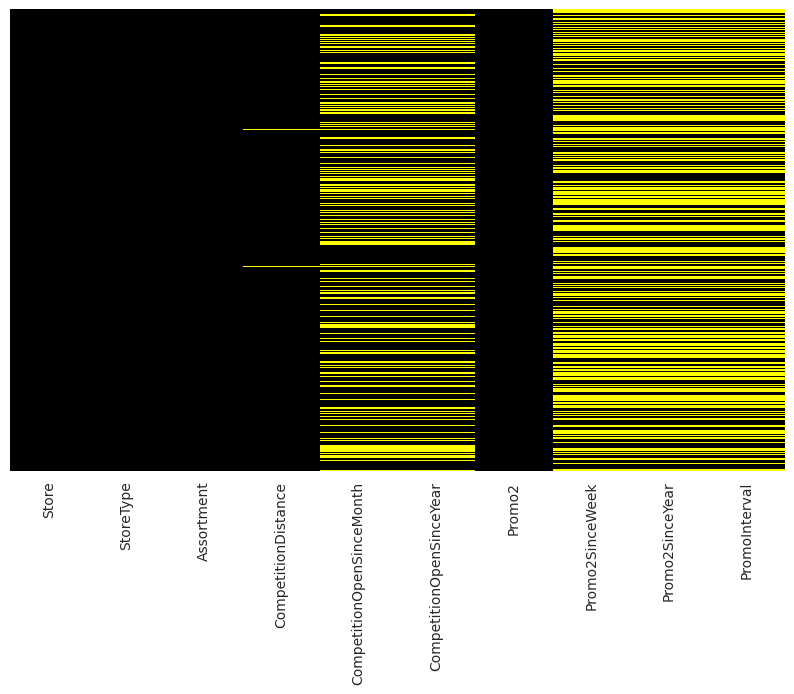

In [44]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(Rossmann_store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

Inferences:


*  No. of features =10
* No. of data ponits =1115
* There are multiple null values which have to be handled.
* There are no duplicate entries.

## ***Understanding Your Variables***

In [45]:
# Dataset Columns
print('Information on what the columns represent:')
Rossmann_store_df.columns

Information on what the columns represent:


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [46]:
# Dataset Describe
print('************ Basic information about the dataset and about data types of the features ***************')
Rossmann_store_df.describe()

************ Basic information about the dataset and about data types of the features ***************


Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

### Variables Description

##**Data Dictionary-**
This dataframe has the following data fields (variables):
**Dependent variables:**


*  **Store-** It denotes a unique identification no. for each store.
*   **StoreType-** The Rossmann stores are divided into 4 types i.e.,  a, b, c, d.
* **Assortment-** It is a variable that categorizes the product variety of stores (a=basic products, b=extra products, c=extended product structure)
* **CompetitionDistance-** It represnts the  distance in meters to the nearest competitor store.
* **CompetitionOpenSinceMonth-** It gives the approximate month of the time the nearest competitor was opened
* **CompetitionOpenSinceYear-** It gives the approximate year of the time the nearest competitor was opened
* **Promo2-** Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating).
* **Promo2SinceWeek-** It describes the calendar week when the store started participating in Promo2.
* **Promo2SinceYear-** It describes the year when the store started participating in Promo2.
* **PromoInterval-**  It describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.








### Check Unique Values for each variable.

In [47]:
# Check Unique Values for each variable.
# Call the function
print_unique_values(Rossmann_store_df)

Unique values of 'Store': [1, 742, 748, 747, 746, 745, 744, 743, 741, 733, 740, 739, 738, 737, 736, 735, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 734, 732, 767, 707, 713, 712, 711, 710, 709, 708, 706, 731, 705, 704, 703, 702, 701, 700, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 766, 768, 837, 812, 818, 817, 816, 815, 814, 813, 811, 803, 810, 809, 808, 807, 806, 805, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 804, 802, 769, 777, 783, 782, 781, 780, 779, 778, 776, 801, 775, 774, 773, 772, 771, 770, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 699, 698, 697, 603, 609, 608, 607, 606, 605, 604, 602, 594, 601, 600, 599, 598, 597, 596, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 595, 593, 696, 568, 574, 573, 572, 571, 570, 569, 567, 592, 566, 565, 564, 563, 562, 561, 575, 576, 577, 578, 

## ***Data Wrangling***

**Feature Engineering & Data Pre-processing**

Handling null values:

In [48]:
#Remove features which have more than 30% missing (null) values.
Rossmann_store_df = Rossmann_store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Replace missing values in features with low percentages of missing values

**Chart- Histogram plot of Store Competition Distance**

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

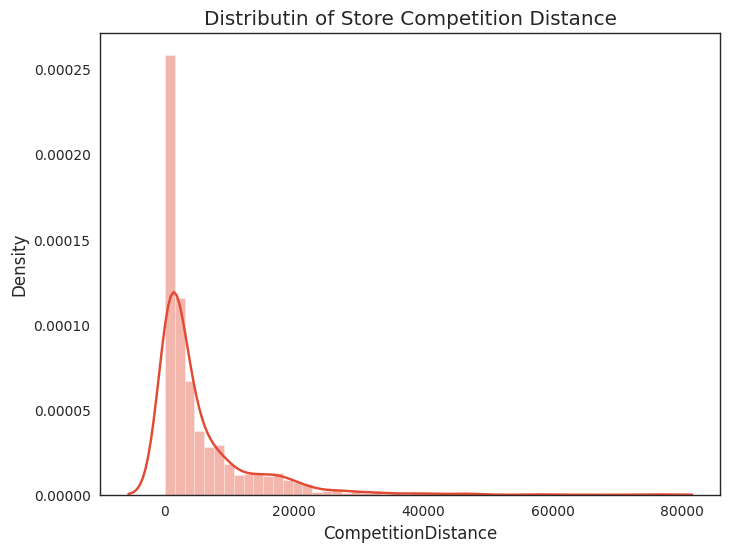

In [49]:
# CompetitionDistance is distance in meters to the nearest competitor store
# Plot its distribution to make further analysis

sns.distplot(Rossmann_store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

Inference:


*   The distribution is right skewed, so it is best to replace the missing values with the median.


In [50]:
# Replace missing values in CompetitionDistance with median for the store dataset

Rossmann_store_df.CompetitionDistance.fillna(Rossmann_store_df.CompetitionDistance.median(), inplace=True)

### Manipulations done and insights found:

The following manipulations have been done:


*   Handling of null values is done by removing features which have more than 30% missing (null) values.
*   The missing values in the feature 'CompetitionDistance' are replaced by the median values.

The following inference can be deduced:


*   The dataset contains data of sales for 3 years approximately (2.7 years precisely).








##**Univariate Analysis:**


**Chart : Frequency distribution of all the features.**

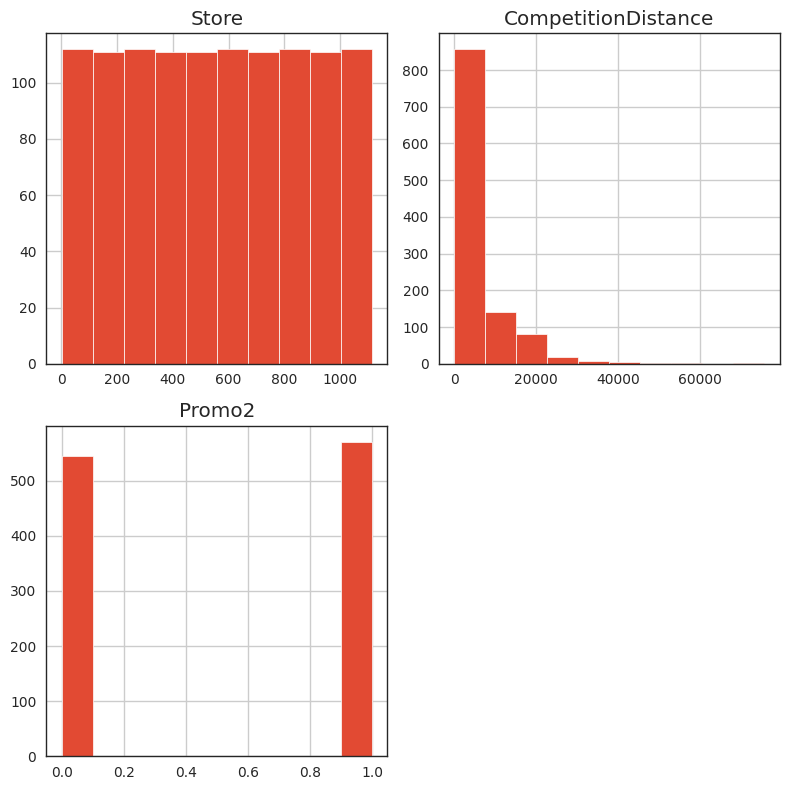

In [51]:
# Chart 1: Freq distribution of all data
fig, ax = plt.subplots(figsize=(8,8)) #To create a 15 inch x 15 inch plot
pd.DataFrame.hist(Rossmann_store_df,ax=ax) #To make a histogram of all columns of the Pandas dataframe.
plt.tight_layout();

Reason for choosing histograms:

Histograms are useful graphs for representing the numerical distribution of data. Hence, histograms of all the features of the dataset are drawn to get an idea of the values that the different features take.

Inferences:


* The above graph shows the counts of all the unique values of all the features in the dataset.
* Most of the times the store is open.
* There are very few school holidays and even fewer state holidays.

##**Bivariate Analysis:**


##**Multivariate Analysis:**


**Chart- Pairplot for Store Dataset**

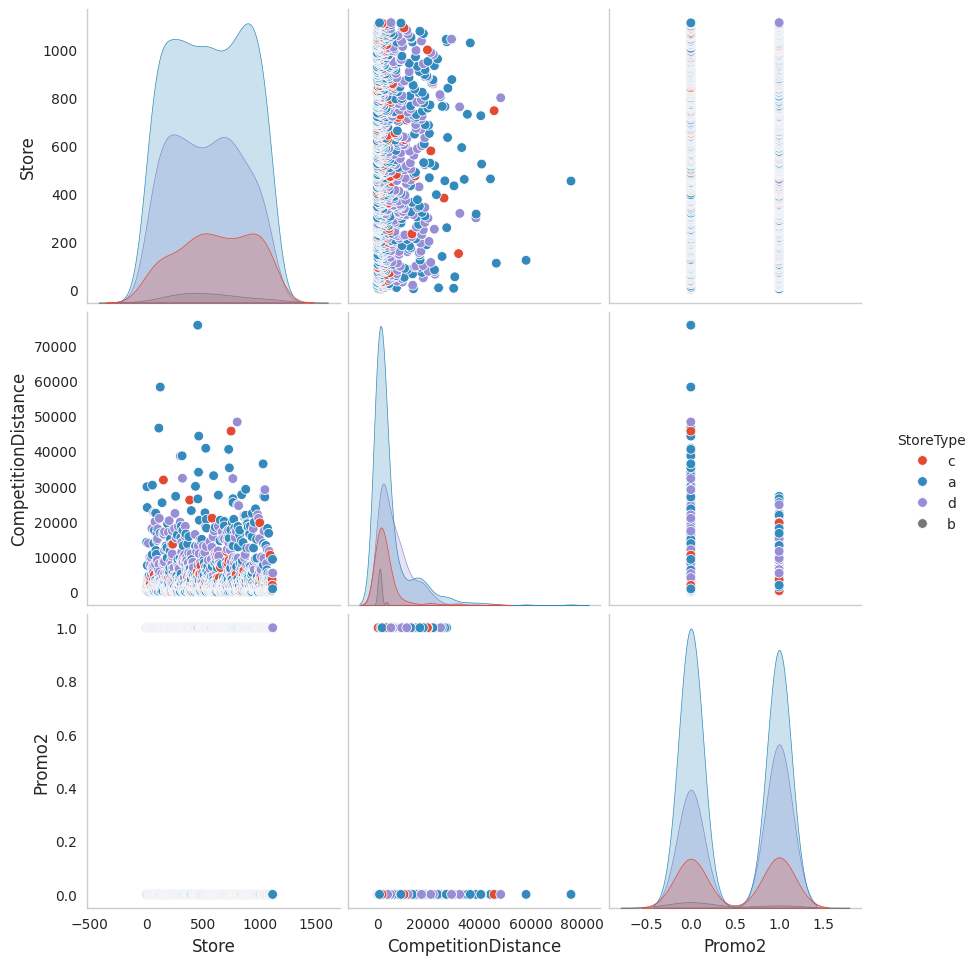

In [52]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(Rossmann_store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

**Chart- Plot between asortment type and store type**

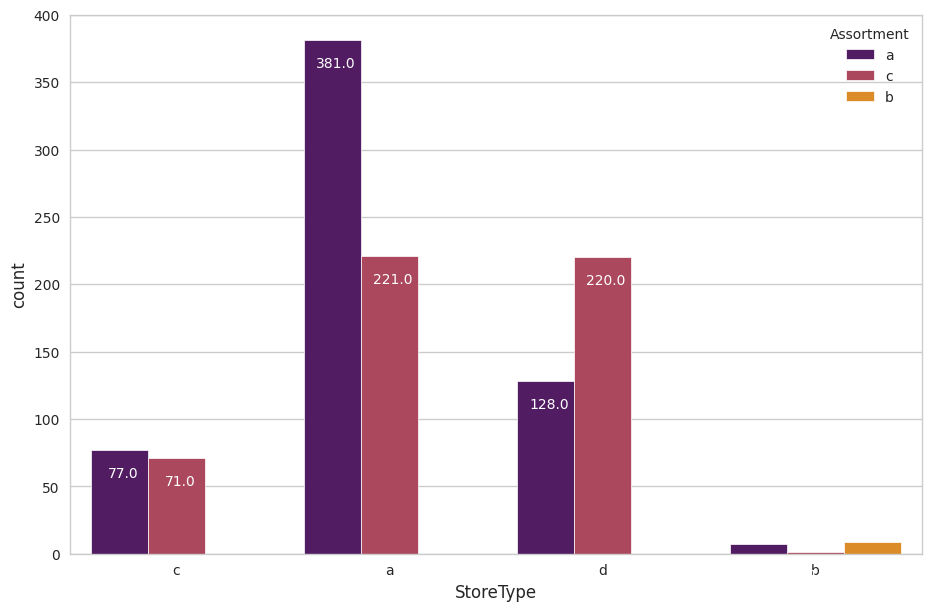

In [53]:
#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=Rossmann_store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

Inferences-


*   Store type c has majorly type a and type c assortments.
*   Store type c has maximum number of stores and has more no. of type a than type c assortments.
* Store type d has more no. of type c assortments than type a assortments.
* Store type b are the least in no. and thhey have all types of assortments.



### What all manipulations have you done and insights you found?

The following manipulations have been done:


*   Features with more than 30% missing values are removed.
*   Handling of null values of CompetitionDistance is done.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


#**3. Data Analysis and Visualization of dataset obtained by merging the two datasets, Rossmann_sales_df and Rossmann_stores_df:**

In [54]:
df = pd.merge(Rossmann_sales_df, Rossmann_store_df, how='left', on='Store')
df.head() #view the first 5 rows of the merged dataset

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      2          5 2015-07-31   6064        625     1      1              1   
2      3          5 2015-07-31   8314        821     1      1              1   
3      4          5 2015-07-31  13995       1498     1      1              1   
4      5          5 2015-07-31   4822        559     1      1              1   

   Year  Month  Day  WeekOfYear StoreType Assortment  CompetitionDistance  \
0  2015      7   31          31         c          a               1270.0   
1  2015      7   31          31         a          a                570.0   
2  2015      7   31          31         a          a              14130.0   
3  2015      7   31          31         c          c                620.0   
4  2015      7   31          31         a          a              29910.0   

   Promo2  
0       0  
1       1  
2       1  
3       0  
4       0

In [55]:
# To describe the merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   SchoolHoliday        1017209 non-null  int64         
 8   Year                 1017209 non-null  int64         
 9   Month                1017209 non-null  int64         
 10  Day                  1017209 non-null  int64         
 11  WeekOfYear           1017209 non-null  int64         
 12  StoreType            1017209 non-null  object        
 1

In [56]:
# Check Unique Values for each variable.
# Call the function
print_unique_values(df)

Unique values of 'Store': [1, 726, 708, 709, 713, 714, 715, 717, 718, 720, 721, 722, 723, 724, 725, 727, 705, 728, 729, 730, 731, 732, 733, 734, 735, 737, 738, 740, 741, 742, 707, 704, 665, 685, 667, 668, 672, 673, 674, 675, 676, 678, 679, 680, 681, 682, 683, 686, 703, 687, 688, 689, 690, 691, 692, 693, 695, 696, 697, 698, 699, 700, 743, 745, 746, 798, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 799, 747, 800, 801, 802, 803, 807, 808, 809, 810, 811, 812, 813, 814, 816, 783, 782, 781, 780, 748, 749, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 767, 768, 769, 770, 772, 773, 774, 776, 777, 779, 666, 664, 818, 566, 552, 553, 554, 556, 557, 2, 559, 560, 561, 562, 563, 564, 565, 567, 550, 568, 569, 570, 572, 574, 576, 577, 578, 579, 580, 581, 582, 583, 551, 549, 663, 528, 511, 513, 515, 516, 517, 519, 520, 521, 523, 524, 525, 526, 527, 529, 548, 530, 531, 532, 533, 535, 536, 537, 538, 541, 543, 544, 545, 546, 584, 585, 586, 645, 626, 627, 62

##EDA On Merged Dataset

##**Multivariate Analysis:**


**Chart- Heatmap Of Merged Dataset**

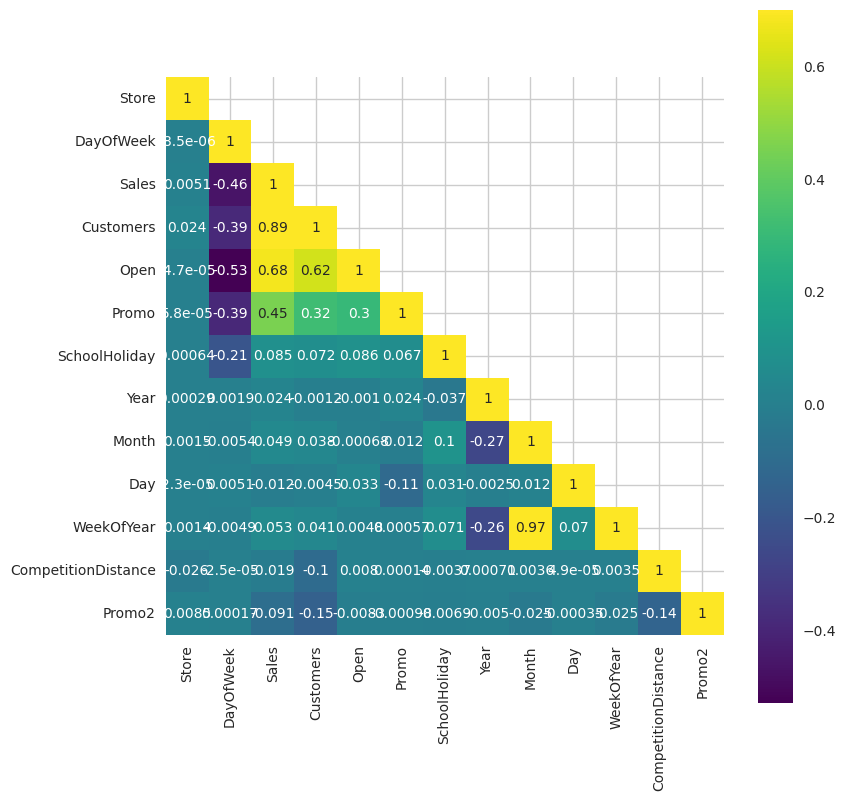

In [57]:
#Call function to display heatmap
create_heatmap(df)

Reasons for choosing heatmap:


*   A heatmap is selected here to visualize the correlation matrix of the merged dataset, df.


Inferences:


*   There is a high correlation (of 0.89) between Sales and Customers which is quite obvious since more customers imply more sales.
*   There is a moderate correlation of 0.68 between Sales and if the store is Open (which is quite obvious too). Also, there is a high correlation between Month and WeekofYear (0.97) and a moderate correlation of 0.62 between Customers and Open. These are quite ovious as there will be more sales if the store is open and customer comes and as such these correlation don't provide much information.
* There is a moderate correlation between Sales and Promo (of 0.45).



Will the gained insights help in creating a positive business impact?


*   Sales has a moderately positive correlation with Promo which means that the promotional offer is quite helpful in boosting of sales. It implies that such types of promotional offers should be freuently done to attract customers.





**Chart- Grouped bar charts for analysis of total and average sales and number of customers for different store types.**

In [58]:
#Calculate the average sales:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

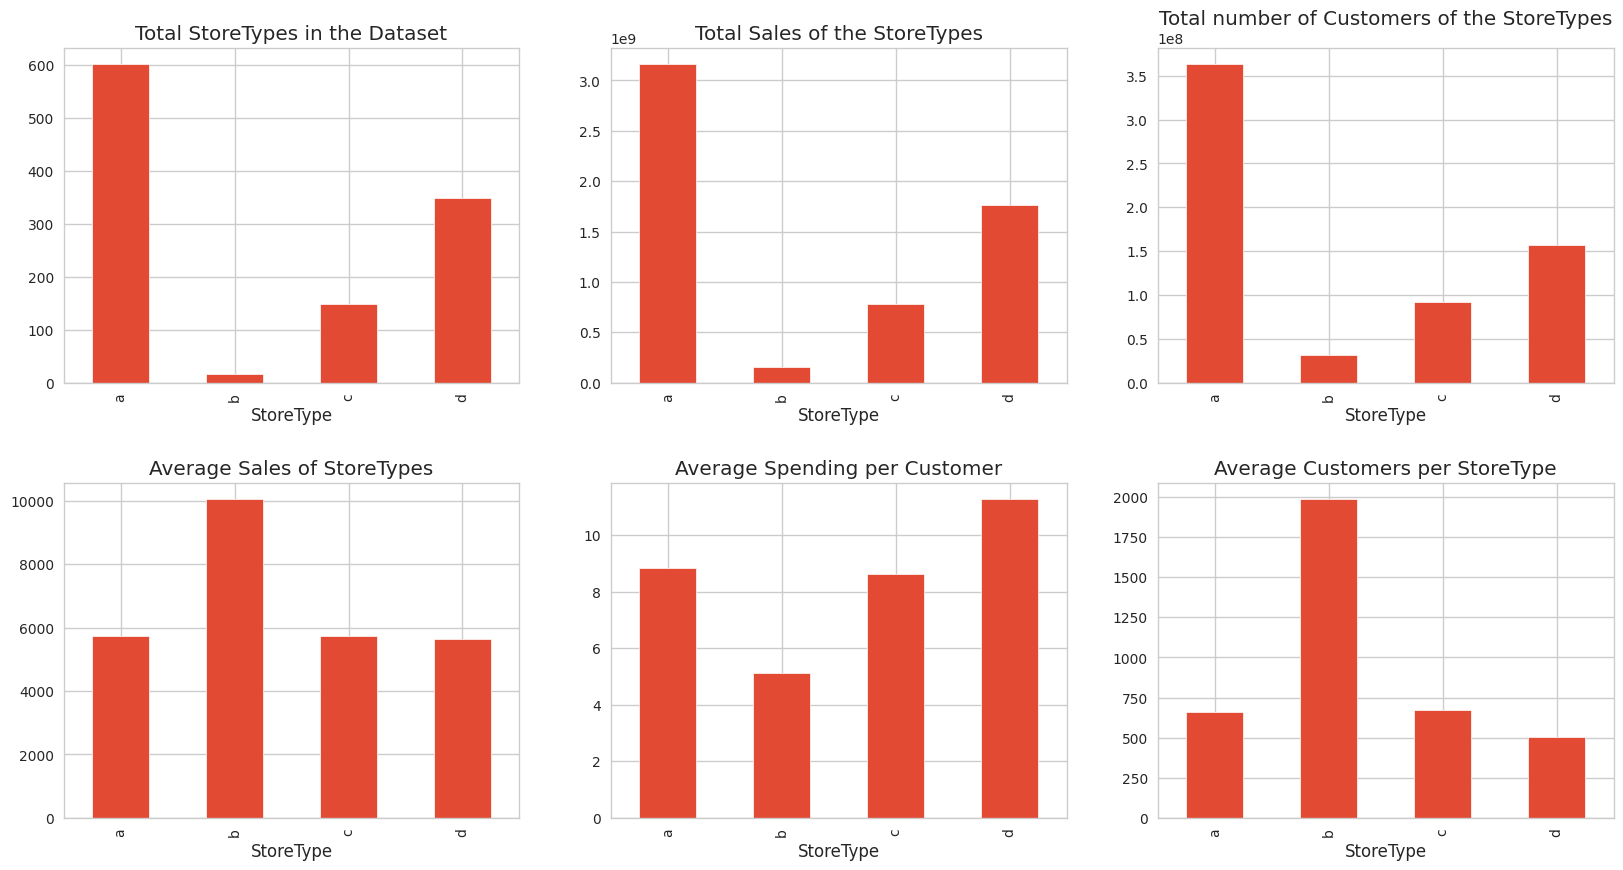

In [59]:
# Create subplots layout with 2 rows and 3 columns, setting the figure size
f, ax = plt.subplots(2, 3, figsize=(20, 10))

# To plot the count of stores for each StoreType on the first subplot (top-left)
Rossmann_store_df.groupby("StoreType")["Store"].count().plot(kind="bar", ax=ax[0, 0], title="Total StoreTypes in the Dataset")

# To plot the total sales for each StoreType on the second subplot (top-center)
df.groupby("StoreType")["Sales"].sum().plot(kind="bar", ax=ax[0, 1], title="Total Sales of the StoreTypes")

# To plot the total number of customers for each StoreType on the third subplot (top-right)
df.groupby("StoreType")["Customers"].sum().plot(kind="bar", ax=ax[0, 2], title="Total number of Customers of the StoreTypes")

# To plot the average sales for each StoreType on the fourth subplot (bottom-left)
df.groupby("StoreType")["Sales"].mean().plot(kind="bar", ax=ax[1, 0], title="Average Sales of StoreTypes")

# To plot the average spending per customer for each StoreType on the fifth subplot (bottom-center)
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind="bar", ax=ax[1, 1], title="Average Spending per Customer")

# To plot the average number of customers per StoreType on the sixth subplot (bottom-right)
df.groupby("StoreType")["Customers"].mean().plot(kind="bar", ax=ax[1, 2], title="Average Customers per StoreType")

# Adjust the vertical space between subplots
plt.subplots_adjust(hspace=0.3)

# Display the plots
plt.show()

Reason for choosing grouped bar charts:


*   Grouped bar charts display bars for different categories side-by-side within each group, where each group represents a specific category or subset of the data.
*   Each subplot compares various statistics (such as total sales, total customers, average sales, etc.) across different store types.
* By arranging multiple bar charts in a grid layout, it's possible to visualize and compare multiple variables simultaneously. This helps in gaining insights into how different factors vary across different categories or groups.



Inference:


*   StoreType A has the most stores, sales and customers. However the StoreType D has the best average spendings per customers. StoreType B, with only a few stores but has the highest number of average customers and average sales.



Will the gained insights help in creating a positive business impact?

Yes, the following insights can be gained:


*   Optimizing Store Strategies: Understanding that StoreType A has the highest number of stores, sales, and customers suggests that this type of store is potentially very popular or strategically placed. This insight can inform decisions on allocating resources such as marketing efforts, staffing, and inventory management to maximize profitability in these stores.
* Improving Performance: Recognizing that StoreType D has the best average spending per customer implies that these stores are effective at encouraging higher spending among their customers. This insight could lead to further analysis into the strategies employed by StoreType D, which could then be implemented in other store types to boost sales and profitability.
* Targeted Marketing and Customer Experience: Understanding that StoreType B has the highest average number of customers despite having fewer stores suggests that these stores may be attracting a large volume of customers per location. This insight could be used to tailor marketing strategies or enhance the customer experience in these stores to capitalize on the higher foot traffic.
* Resource Allocation: With limited resources, knowing the strengths and weaknesses of each store type allows for more strategic resource allocation. For example, investing more in StoreType D to maintain its high average spending per customer or focusing on expanding StoreType B to leverage its high average customer count.
* Strategic Expansion or Optimization: Insights into the performance of different store types can guide decisions on whether to expand certain types of stores, optimize existing operations, or even consider rebranding or restructuring to better align with successful models.





**Chart- Plot between Sales, Promo and Promo2**

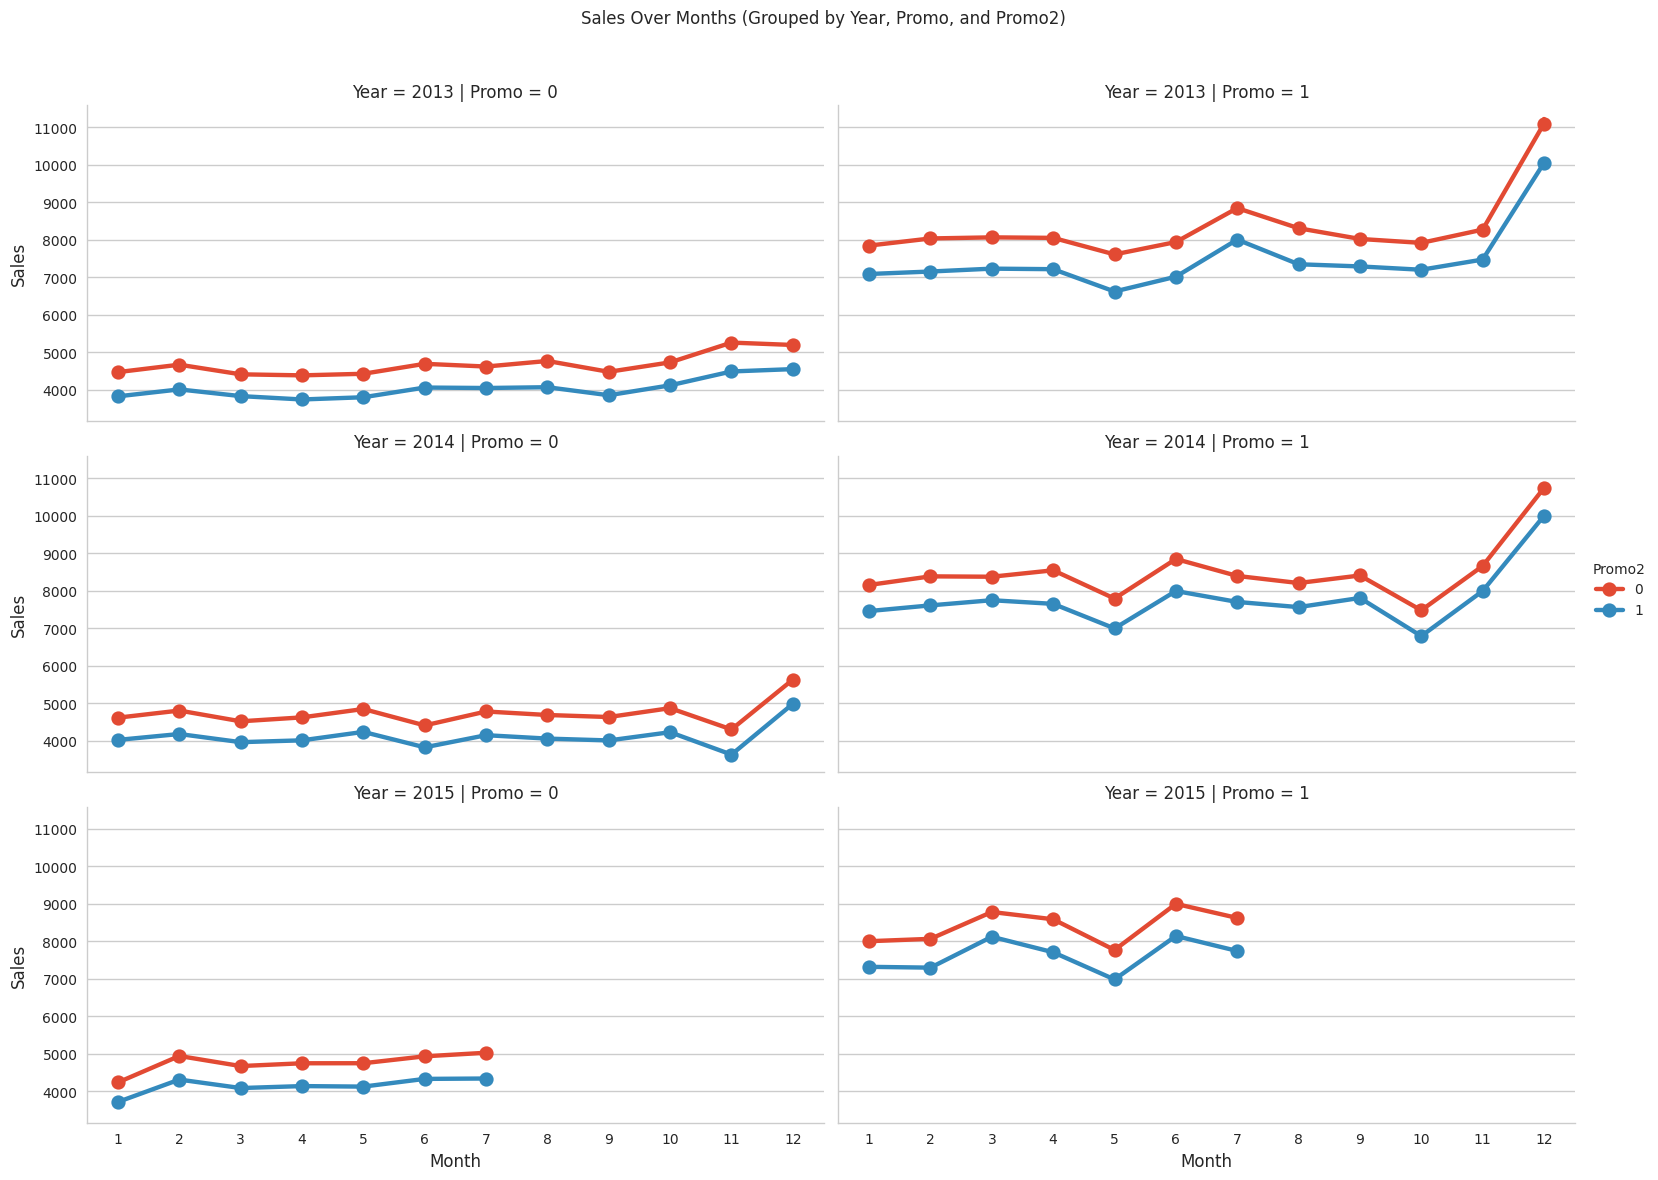

In [60]:
# Create a FacetGrid with rows for each year
g = sns.FacetGrid(df, col='Promo', hue='Promo2', row='Year', height=4, aspect=2)

# Map the point plot onto the grid
g.map(sns.pointplot, 'Month', 'Sales')

# Add legend
g.add_legend()

# Adjust space between plots
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sales Over Months (Grouped by Year, Promo, and Promo2)')

# Show the plot
plt.show()


Reasons for selecting FacetGrid graph:


*   Using a FacetGrid plot allows for the simultaneous exploration of sales trends across different months, years, and promotional conditions.
*   By faceting the plot based on 'Year' and 'Promo' conditions, and using 'Promo2' as a hue, the visualization enables easy comparison of sales trends across different promotional activities and years. This can help identify patterns, trends, or anomalies in sales behavior based on different promotional strategies.



Inferences:


*   Regardless of whether there is a Promo or not, sales with or without Promo2 are always lower compared to those with a Promo. Hence, Promo appears to be more affective than Promo2.
*   Higher promotions implies higher sales, no matter what the year. Promo and Promo2 lead to tremendous increase in sales with Promo making more sales than Promo2.





Will the gained insights help in creating a positive business impact?

The insights gained from the analysis can lead to several positive impacts on the business:



*   **Strategic Promotional Planning**: Understanding that Promo appears
to be more effective than Promo2 in driving sales can inform the business's promotional strategies. The company can allocate resources more effectively by focusing on implementing and optimizing Promo campaigns to maximize sales.
*   **Resource Allocation**: With the knowledge that higher promotions lead to higher sales regardless of the year, the company can allocate resources towards promotional activities with confidence. This might involve investing more in Promo campaigns, allocating marketing budgets accordingly, and adjusting staffing levels to accommodate increased demand during promotional periods.
* **Revenue Maximization**: By leveraging insights into the impact of Promo and Promo2 on sales, the business can aim to maximize revenue generation. This could involve scheduling promotional events strategically throughout the year to capitalize on periods of higher sales potential and adjusting pricing strategies to optimize promotional effectiveness.
* **Competitive Advantage**: Armed with the understanding that Promo drives more sales than Promo2, the business can gain a competitive advantage by focusing its promotional efforts on the most effective strategies. This can help the company capture a larger market share and outperform competitors who may not have optimized their promotional activities as effectively.
* **Customer Engagement and Loyalty**: Effective promotional strategies can lead to increased customer engagement and loyalty. By offering compelling promotions that drive sales, the business can enhance customer satisfaction, encourage repeat purchases, and foster long-term relationships with customers.
* **Data-Informed Decision Making**: The insights gained from the analysis enable data-informed decision-making processes. This empowers the business to make strategic decisions backed by evidence and analysis, reducing guesswork and increasing the likelihood of success in promotional endeavors.

**Chart- Plot between Sales, Promo and DayOfWeek**

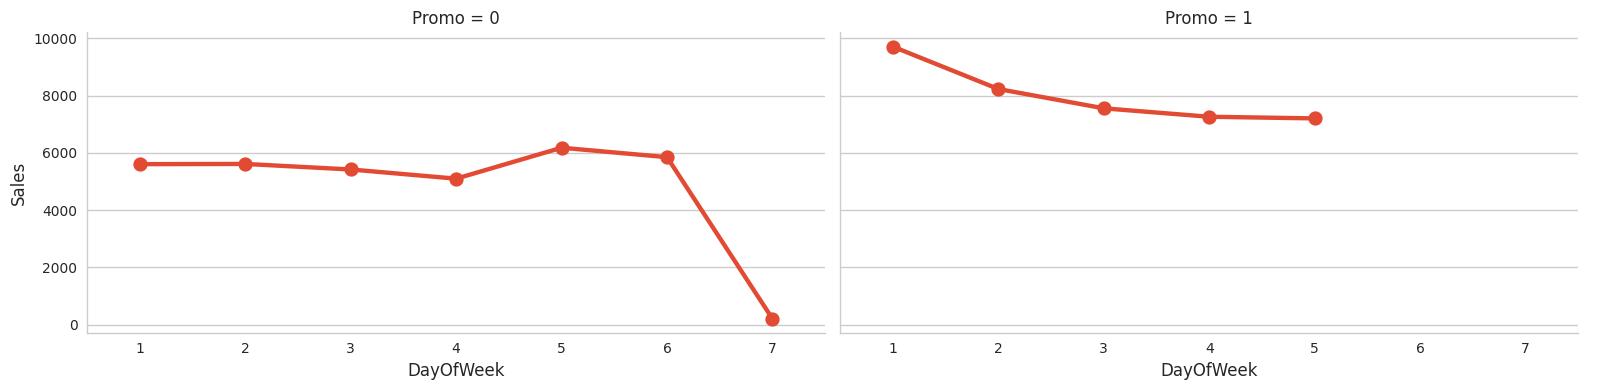

In [61]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Promo', height=4, aspect=2)

# Map the point plot onto the grid
g.map(sns.pointplot, 'DayOfWeek', 'Sales')

# Add legend
g.add_legend()

# Show the plot
plt.show()

Reasons for choosing Facetgrid chart:




*   By using the FacetGrid plot based on DayOfWeek and Promo status, it is aimed to uncover any patterns or trends in sales performance across different days of the week and promotional periods.
*   FacetGrid charts allow us to create a grid of subplots, with each subplot representing a unique combination of DayOfWeek and Promo condition. This layout enables us to compare sales figures across different days of the week while considering the presence or absence of promotional activities.





Inferences:


*   On the 7th day of the week, there are negligible sales since the store is closed on most of the Sundays.
*   With Promo, sales increase and the maximum sales are observed on Maondays and then decrease every day.
* Promo is there only for first 5 days of the week due to which sales are more with Promo on those days.



In [62]:
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")

There are 33 stores opend on sundays


Will the gained insights help in creating a positive business impact?

Yes, the gained insights will likely help in creating a positive business impact. Here's how:



*   **Operational Efficiency**: Understanding that negligible sales occur on Sundays due to store closures allows for better operational planning. The business can allocate resources more efficiently by adjusting staffing levels and inventory management practices to match lower demand on Sundays, potentially reducing costs associated with overstaffing or excess inventory.
*   **Promotional Effectiveness**: Recognizing that sales increase with Promo and observing the trend of maximum sales on Mondays, followed by a decrease each day, provides valuable insight into the effectiveness of promotional strategies. This understanding can inform the timing and intensity of promotional campaigns, ensuring that resources are allocated to maximize impact during peak sales periods.

* **Revenue Optimization**: With the knowledge that Promo is only active for the first 5 days of the week and that sales are higher with Promo during this period, the business can strategically schedule promotions to coincide with days of highest sales potential. This targeted approach to promotional planning can lead to increased revenue generation by capitalizing on consumer behavior patterns.

4. **Customer Satisfaction**: By aligning operational hours and promotional activities with customer demand patterns, the business can enhance the overall customer experience. This may include adjusting store hours, offering special promotions on high-sales days, and ensuring sufficient staffing levels to provide quality service during peak periods, ultimately leading to greater customer satisfaction and loyalty.

5. **Competitive Advantage**: Leveraging insights into sales trends and consumer behavior can provide a competitive advantage in the marketplace. By optimizing operations and promotional strategies based on data-driven insights, the business can differentiate itself from competitors, attract more customers, and increase market share.


**Chart- Plot between Sales, Month and StoreType**

Visualization of trends on a yearly basis:

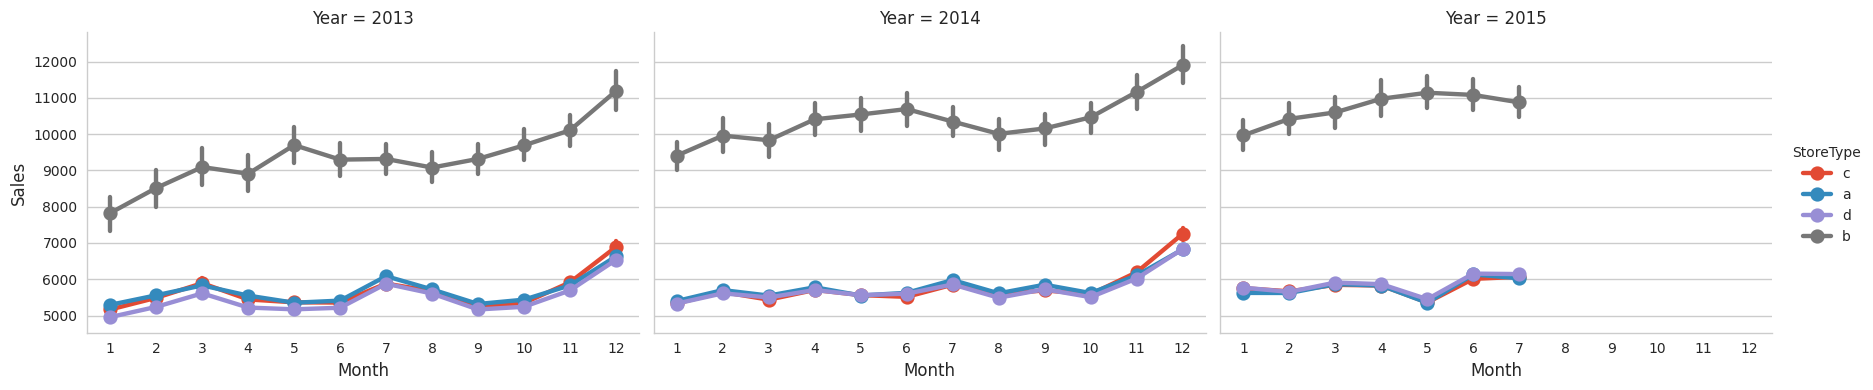

In [63]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Year', hue='StoreType', height=4, aspect=1.5)

# Map the point plot onto the grid
g.map(sns.pointplot, 'Month', 'Sales')

# Add legend
g.add_legend()

# Show the plot
plt.show()
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly.

Inferences:


*   The sales stay constant for all years.
*   Sales are maximum for StoreType b.
* Sales are almost same for store types a, d and c.



Will the gained insights help in creating a positive business impact?

Yes, the gained insights will likely help in creating a positive business impact. Here's how:


*   **Resource Optimization:** Since sales stay constant across all years, the business can optimize its resources more effectively. This includes inventory management, staffing levels, and budget allocation. With stable sales trends, the business can allocate resources efficiently to maintain operations without over or understocking inventory, leading to cost savings and improved profitability.
*   **Strategic Focus:** Knowing that StoreType B generates the maximum sales provides valuable information for strategic decision-making. The business can focus its efforts on leveraging the strengths of StoreType B, potentially by expanding similar strategies to other store types or investing further in StoreType B to maximize its revenue potential.
* **Market Analysis:** Identifying that sales are almost the same for StoreTypes A, D, and C allows the business to conduct further market analysis to understand the reasons behind this similarity. This analysis can uncover market trends, customer preferences, or competitive dynamics that may be influencing sales. Armed with this knowledge, the business can tailor its marketing strategies and product offerings to better meet the needs of customers in each store type, potentially driving increased sales and customer satisfaction.
* **Competitive Positioning:** With a clear understanding of sales performance across different store types, the business can strategically position itself in the market. By capitalizing on the strengths of StoreType B and addressing any potential weaknesses in other store types, the business can enhance its competitive position, attract more customers, and increase market share.

**Chart- Plot between competition distance and average total sales and average total customers**



In [64]:
# Calculate summary statistics for the 'CompetitionDistance' column
df.CompetitionDistance.describe()

# Create a new categorical variable based on 'CompetitionDistance' column
# Divide the values into 5 equal-width bins and assign each observation to one of these bins
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

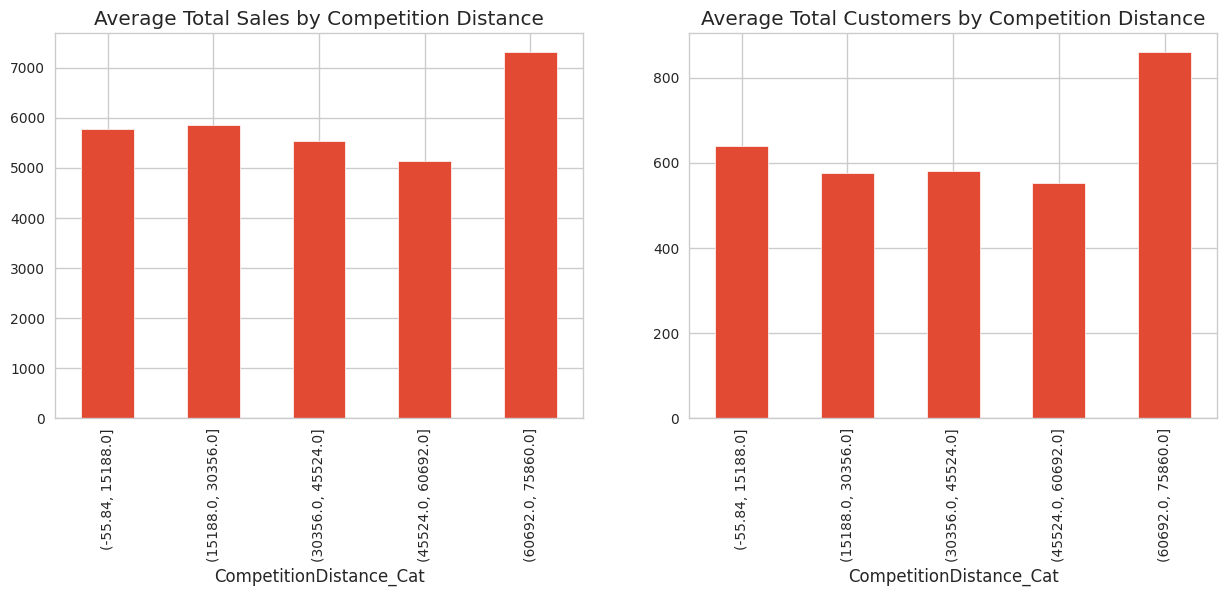

In [65]:
# Create a figure with two subplots side by side
f, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the average total sales by competition distance on the first subplot
df.groupby(by="CompetitionDistance_Cat").Sales.mean().plot(kind="bar", title="Average Total Sales by Competition Distance", ax=ax[0])

# Plot the average total customers by competition distance on the second subplot
df.groupby(by="CompetitionDistance_Cat").Customers.mean().plot(kind="bar", title="Average Total Customers by Competition Distance", ax=ax[1])

Reason for choosing bar chart:


*   Bar charts are effective for comparing values across different categories, making them suitable for visualizing the average total sales and customers across different competition distance categories.
*   The data being visualized here is categorical (competition distance categories) and numerical (average total sales and customers), which aligns well with the use of bar charts.
* The use of multiple subplots allows for side-by-side comparison of average total sales and customers, enhancing the visual comparison between the two variables.



Inference:


*   If the competion store is very far away, the stores are performing better (in terms of both sales and customers).




Will the gained insights help in creating a positive business impact?


*   **Location Strategy:** The company could use this
insight to inform its location strategy for opening new stores. By targeting areas where competition is minimal or far away, the company can potentially capture more market share and increase sales.
*   **Marketing and Promotion:** Understanding that stores perform better when competition is distant, the company could allocate marketing and promotional resources more effectively. They could focus more on advertising and promotions in areas where competition is closer, to mitigate any potential negative impact, while perhaps reducing marketing spend in areas where competition is already sparse.
* **Product Assortment:** The company could tailor its product assortment based on the distance of competition stores. For example, in areas where competition is far away, they could stock a wider range of products or focus on premium offerings to attract customers who may be willing to travel farther for a unique shopping experience.
* **Customer Experience:** With the knowledge that stores perform better when competition is distant, the company could prioritize investments in enhancing the customer experience in those areas. This could include initiatives such as improving store layout, providing better customer service, or implementing loyalty programs to retain customers.
* **Operational Efficiency:** Understanding the relationship between competition distance and store performance can also inform operational decisions. For instance, the company could optimize inventory management and supply chain logistics to ensure that stores in areas with less competition are well-stocked and have timely replenishment of popular items.

In [66]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)
#Drop these features since analysis has been done as they are of no further need.

## **Handling outliers for sales:**

Chart- Box plot for visualization of outliers in Sales

<Axes: ylabel='Sales'>

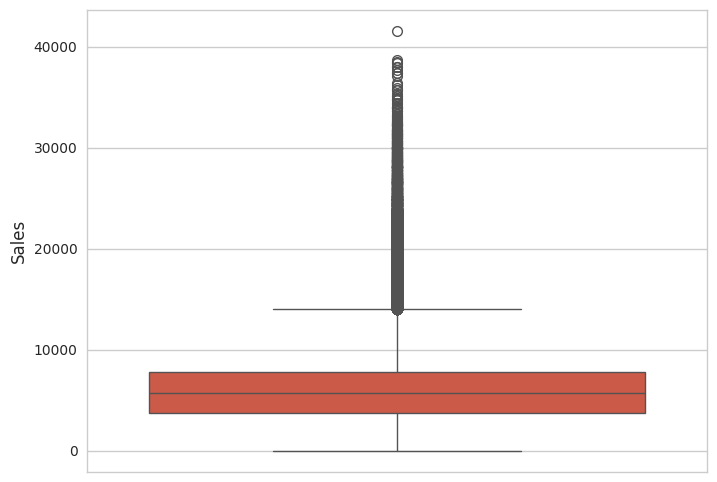

In [67]:
#checking outliers in sales
sns.boxplot(df['Sales'])

**Removing Outliers Of Sales Column**

In [68]:
#Define function for removing outliers
def remove_outlier(df_in, col_name):
    """
    Remove outliers from a DataFrame based on a specified column.
    I/P args:
        df_in : DataFrame
            Input DataFrame containing the data.
        col_name : str
            Name of the column from which outliers should be removed.
    O/P args:
        df_out : DataFrame
            DataFrame with outliers removed based on the specified column.
    """
    # Calculate the first quartile (Q1)
    q1 = df_in[col_name].quantile(0.25)

    # Calculate the third quartile (Q3)
    q3 = df_in[col_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds (fences) for identifying outliers
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    # Filter the DataFrame to keep only the rows where the column values are within the fences
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]

    return df_out

In [69]:
# Function calling
df= remove_outlier(df, 'Sales')

# **Conclusions:**



*   Sales have a strong correlation with the number of customers.
*   The store type labeled 'a' demonstrates the highest sales volume and customer traffic.
* StoreType 'b' exhibits the lowest average sales per customer, suggesting that customers tend to visit this type of store primarily for smaller purchases.
* StoreType 'd' boasts the highest average buyer cart size among all store types.
* Promotions typically run only on weekdays.
* Across all stores, promotional activities result in increased sales and customer footfall.
* During school holidays, there is a greater tendency for stores to open compared to state holidays.
* Stores open during school holidays experience higher sales volumes compared to regular days.
* Sales show an uptick during the Christmas week (in December), potentially attributed to increased purchases of beauty products during the festive season.
* Promo2 implementation does not appear to correlate significantly with changes in sales volume.
























In [170]:
df.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  SchoolHoliday  Year  \
0      1          5 2015-07-31   5263        555      1              1  2015   
1      2          5 2015-07-31   6064        625      1              1  2015   
2      3          5 2015-07-31   8314        821      1              1  2015   
3      4          5 2015-07-31  13995       1498      1              1  2015   
4      5          5 2015-07-31   4822        559      1              1  2015   

   Month  Day  WeekOfYear StoreType Assortment  CompetitionDistance  Promo2  
0      7   31          31         c          a               1270.0       0  
1      7   31          31         a          a                570.0       1  
2      7   31          31         a          a              14130.0       1  
3      7   31          31         c          c                620.0       0  
4      7   31          31         a          a              29910.0       0

## ***4. Hypothesis Testing***

## **Hypothesis 1**

Null Hypothesis (H0): There is no significant difference in the mean sales between the groups with and without the Promo2 program.

Alternative Hypothesis (H1): Sales are affected by the Promo program, suggesting a significant difference in the mean sales between the groups with and without the Promo2 program.

In [173]:
import pandas as pd
from scipy.stats import ttest_ind


# Calculate the mean sales for each Promo2 category
sales_promo = df.groupby('Promo2')['Sales'].mean().reset_index()
print(sales_promo)

# Perform the t-test
sales_promo0 = df[df['Promo2'] == 0]['Sales']
sales_promo1 = df[df['Promo2'] == 1]['Sales']
t_statistic, p_value = ttest_ind(sales_promo0, sales_promo1)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Since the p-value ({:.2e}) is less than {}, we reject the null hypothesis.".format(p_value, alpha))
    print("Thus, we infer that Promo2 program adversely affects Sales. Hence, H1 is true.")
else:
    print("Since the p-value ({:.2e}) is greater than or equal to {}, we fail to reject the null hypothesis.".format(p_value, alpha))


   Promo2        Sales
0       0  6864.770466
1       1  6383.244823
t-statistic: 88.6200274871731
p-value: 0.0
Since the p-value (0.00e+00) is less than 0.05, we reject the null hypothesis.
Thus, we infer that Promo2 program adversely affects Sales. Hence, H1 is true.


## **Hypothesis 2**

Null Hypothesis (H0): There is no significant difference in sales before and after the 10th day of each month.

Alternative Hypothesis (H1): Stores sell more after the 10th day of each month compared to before the 10th day.

In [171]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract day of the month
df['Day'] = df['Date'].dt.day

# Split data into sales before and after the 10th day of each month
df_before_10th = df[df['Day'] <= 10]
df_after_10th = df[df['Day'] > 10]
sales_before_10th = df[df['Day'] <= 10]['Sales']
sales_after_10th = df[df['Day'] > 10]['Sales']


In [172]:
from scipy.stats import ttest_ind

# Perform t-test
t_statistic, p_value = ttest_ind(sales_before_10th, sales_after_10th)

# Define significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis: Sales are significantly higher after the 10th day of each month.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales before and after the 10th day of each month.")


Reject the null hypothesis: Sales are significantly higher after the 10th day of each month.


## **Hypothesis 3**

Null Hypothesis (H0): There is no difference in sales between the first half and the second half of the year.

Alternative Hypothesis (H1): Stores sell more in the second half of the year compared to the first half.

In [174]:
# Convert 'Date' column to datetime type if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Splitting the data into two halves based on the date
half_year_date = df['Date'].quantile(0.5)  # Get the date for the middle of the year
sales_first_half = df[df['Date'] <= half_year_date]['Sales']
sales_second_half = df[df['Date'] > half_year_date]['Sales']

# Print the first few rows of each half for verification
print("First Half Sales Data:")
print(sales_first_half.head())

print("\nSecond Half Sales Data:")
print(sales_second_half.head())


First Half Sales Data:
512115    4583
512116    2815
512117    4200
512118    8880
512119    1747
Name: Sales, dtype: int64

Second Half Sales Data:
0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64


In [176]:
from scipy import stats

# Perform t-test
t_statistic, p_value = stats.ttest_ind(sales_first_half, sales_second_half)

# Define significance level
alpha = 0.05

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. Stores sell more in the second half of the year.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sales between the first and second halves of the year.")


T-Statistic: -62.946144088240125
P-Value: 0.0
Reject the null hypothesis. Stores sell more in the second half of the year.


## ***5. Feature Engineering & Data Pre-processing***

####Create a copy of the dataset.

In [70]:
df_new=df.copy() #Create a copy of the datframe.

In [71]:
df_new.head() #View the dataset after manipulations.

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      2          5 2015-07-31   6064        625     1      1              1   
2      3          5 2015-07-31   8314        821     1      1              1   
3      4          5 2015-07-31  13995       1498     1      1              1   
4      5          5 2015-07-31   4822        559     1      1              1   

   Year  Month  Day  WeekOfYear StoreType Assortment  CompetitionDistance  \
0  2015      7   31          31         c          a               1270.0   
1  2015      7   31          31         a          a                570.0   
2  2015      7   31          31         a          a              14130.0   
3  2015      7   31          31         c          c                620.0   
4  2015      7   31          31         a          a              29910.0   

   Promo2  
0       0  
1       1  
2       1  
3       0  
4       0

### Categorical Encoding

In [72]:
# Convert categorical variables into dummy/indicator variables using one-hot encoding.
# This creates binary columns for each category in the specified columns.
# Each observation is assigned a 1 or 0 based on the presence or absence of each category
df_new = pd.get_dummies(df_new, columns=['StoreType', 'Assortment'])

### Feature Manipulation & Selection

### **Removal of rows of data which might cause bias**

In [73]:
# The stores that are not open won't generate sales and hence such rows can be removed.
df = df[df.Open != 0]

In [74]:
# After removing data of stores that are not open, the column 'Open' is no more a variable and hence can be dropped.
df = df.drop('Open', axis=1)

In [75]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [76]:
# Find out the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [77]:
# Remove this subset of data to avoid bias
df = df[df.Sales != 0]

### Data Splitting

In [78]:
# Extract features (independent variables) for predictive modeling
# Drop the specified columns from the DataFrame to create the feature matrix X
# Columns dropped include 'Sales', 'Store', 'Date', and 'Year'
X = df_new.drop(['Sales', 'Store', 'Date', 'Year'], axis=1)

# Extract the target variable (dependent variable) for predictive modeling
# Assign the 'Sales' column to y
y = df_new.Sales

In [79]:
xx=df_new.drop(['Store','Date','Year'] , axis = 1)

In [80]:
X.shape #View shape of the I/P feature

(990515, 17)

In [81]:
X.head() #To view the first fivve rows of the feature matrix.

DayOfWeek  Customers  Open  Promo  SchoolHoliday  Month  Day  WeekOfYear  \
0          5        555     1      1              1      7   31          31   
1          5        625     1      1              1      7   31          31   
2          5        821     1      1              1      7   31          31   
3          5       1498     1      1              1      7   31          31   
4          5        559     1      1              1      7   31          31   

   CompetitionDistance  Promo2  StoreType_a  StoreType_b  StoreType_c  \
0               1270.0       0            0            0            1   
1                570.0       1            1            0            0   
2              14130.0       1            1            0            0   
3                620.0       0            0            0            1   
4              29910.0       0            1            0            0   

   StoreType_d  Assortment_a  Assortment_b  Assortment_c  
0            0             1             0             0  
1            0             1             0             0  
2            0             1             0             0  
3            0             0             0             1  
4            0             1             0             0

In [82]:
# Display the first few rows of the target variable y
y.head()


0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [83]:
# Split your data to train and test.

#### **Split the dataset into Training Set and Testing Set**

In [84]:
# Split the dataset into training and testing sets for both features (X) and target variable (y)
# X_train: Features for training the model
# X_test: Features for testing the model
# y_train: Target variable for training the model
# y_test: Target variable for testing the model
# test_size=0.3: Specifies the proportion of the dataset to include in the testing set (30% in this case)
# random_state=0: Sets the random seed for reproducibility, ensuring that the same split is obtained each time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
columns=X_train.columns

#### Data Transformation

In [86]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***6. ML Model Implementation***

## **Use Pycaret to compare the different regression models for the given dataset**

In [91]:
# Initialize the PyCaret environment and set up the regression task
# data: DataFrame containing the dataset (xx) with features and target variable
# target: Name of the target variable ('Sales' in this case)
# This function automatically preprocesses the data, splits it into training and testing sets,
# performs feature engineering, and prepares the data for model training
reg = setup(data = xx, target = 'Sales')

In [92]:
# Compare performance of multiple regression models
# This function trains and evaluates several regression models on the dataset provided in the setup
# It returns a table with evaluation metrics for each model, allowing for easy comparison of their performance
best_model = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

### **Define functions for calculation of performance metrics.**

In [105]:
#Define RMSE function
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

In [108]:
# Definte MAPE function

def mean_absolute_percentage_error(y_true, y_pred):
    """ This function calculate mean absolute percentage error (MAPE).
    I/P args:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    O/P args:
    - mape: float, mean absolute percentage error
    """
    # Calculate absolute percentage error
    abs_percentage_error = np.abs((y_true - y_pred) / y_true)

    # Replace infinite values with NaN
    abs_percentage_error[np.isinf(abs_percentage_error)] = np.nan

    # Calculate mean ignoring NaN values
    mape = np.nanmean(abs_percentage_error) * 100

    return mape

#**ML Model - 1**

## **Catboost Regression**

In [97]:
# Create CatBoost Pool objects for training and testing datasets

# Create a CatBoost Pool object for the training dataset
# A Pool is a CatBoost-specific data structure that stores the dataset in an efficient format
# X_train: Features for training the model
# y_train: Target variable for training the model

train_dataset = cb.Pool(X_train, y_train)

# Create a CatBoost Pool object for the testing dataset
# X_test: Features for testing the model
# y_test: Target variable for testing the model
test_dataset = cb.Pool(X_test, y_test)

In [98]:
#Create a CatBoost Regressor model with specified loss function

# Initialize a CatBoost Regressor model with root mean squared error (RMSE) as the loss function
# loss_function='RMSE': Specifies the loss function to be used for training the model
# RMSE is a commonly used loss function for regression tasks, which measures the root mean squared error between predicted and actual target values

model = cb.CatBoostRegressor(loss_function='RMSE')


##**Hyperparameter Tuning**

In [99]:
# Define the grid of hyperparameters for grid search

# Define a dictionary representing the grid of hyperparameters to search over
# Each key in the dictionary corresponds to a hyperparameter, and the associated value is a list of values to search over
# The grid includes combinations of different values for 'iterations', 'learning_rate', 'depth', and 'l2_leaf_reg'

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# Perform grid search to find the best hyperparameters

# model: CatBoost model to perform grid search on
# grid: Dictionary defining the grid of hyperparameters to search over
# train_dataset: CatBoost Pool object representing the training dataset

model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
156:	learn: 895.0921407	test: 899.1085685	best: 899.1085685 (156)	total: 3.32s	remaining: 909ms
157:	learn: 894.3167028	test: 898.3222988	best: 898.3222988 (157)	total: 3.35s	remaining: 890ms
158:	learn: 893.6048030	test: 897.5871754	best: 897.5871754 (158)	total: 3.38s	remaining: 871ms
159:	learn: 892.8002725	test: 896.7616347	best: 896.7616347 (159)	total: 3.4s	remaining: 849ms
160:	learn: 892.1042540	test: 896.0635693	best: 896.0635693 (160)	total: 3.41s	remaining: 827ms
161:	learn: 891.4547459	test: 895.3977749	best: 895.3977749 (161)	total: 3.43s	remaining: 804ms
162:	learn: 890.5566562	test: 894.4525255	best: 894.4525255 (162)	total: 3.45s	remaining: 782ms
163:	learn: 889.8408609	test: 893.7097792	best: 893.7097792 (163)	total: 3.46s	remaining: 760ms
164:	learn: 889.1996034	test: 893.0110204	best: 893.0110204 (164)	total: 3.48s	remaining: 738ms
165:	learn: 888.5403091	test: 892.3549333	best: 892.3549333 (165)	total: 3.5s	remainin

{'params': {'depth': 8,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2,
  'iterations': 200},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

**Result of Grid Search based Hyperparameter Tuning-**

This result represents the performance of a CatBoost model with the following hyperparameters:

- Depth: 8
- Learning rate: 0.1
- L2 regularization coefficient: 0.2
- Number of iterations: 200

The performance of the model during cross-validation is represented by the `cv_results` dictionary. Here are the key metrics:

- `test-RMSE-mean`: This represents the mean root mean squared error (RMSE) on the test set across different iterations of cross-validation.
- `test-RMSE-std`: This represents the standard deviation of the RMSE on the test set across different iterations of cross-validation.
- `train-RMSE-mean`: This represents the mean RMSE on the training set across different iterations of cross-validation.
- `train-RMSE-std`: This represents the standard deviation of the RMSE on the training set across different iterations of cross-validation.

These metrics provide insights into how well the model generalizes to unseen data (test set) and its performance on the training set. Lower RMSE values indicate better performance, as they represent smaller errors between the predicted and actual values. Additionally, lower standard deviations indicate more consistent performance across different folds of cross-validation.

In [100]:
# Define hyperparameters for the CatBoost model
hyperparameters = {
    'depth': 8,                # Depth of the trees in the model
    'learning_rate': 0.1,      # Learning rate used for gradient descent during training
    'l2_leaf_reg': 0.2,        # L2 regularization coefficient to prevent overfitting
    'iterations': 200          # Number of boosting iterations (trees) to train
}

In [102]:
# Create a CatBoostRegressor model with the specified hyperparameters
model = cb.CatBoostRegressor(**hyperparameters)
# Train the model on the training dataset
model.fit(train_dataset)

0:	learn: 3073.2210475	total: 64.8ms	remaining: 12.9s
1:	learn: 2809.6324762	total: 130ms	remaining: 12.9s
2:	learn: 2576.0039576	total: 188ms	remaining: 12.3s
3:	learn: 2368.1654999	total: 268ms	remaining: 13.1s
4:	learn: 2182.5727746	total: 322ms	remaining: 12.6s
5:	learn: 2018.9171305	total: 367ms	remaining: 11.9s
6:	learn: 1874.2957138	total: 420ms	remaining: 11.6s
7:	learn: 1749.0559931	total: 501ms	remaining: 12s
8:	learn: 1638.6390461	total: 557ms	remaining: 11.8s
9:	learn: 1539.8691212	total: 608ms	remaining: 11.6s
10:	learn: 1455.0885740	total: 652ms	remaining: 11.2s
11:	learn: 1379.6701480	total: 700ms	remaining: 11s
12:	learn: 1314.5774848	total: 767ms	remaining: 11s
13:	learn: 1256.5956972	total: 820ms	remaining: 10.9s
14:	learn: 1207.4473879	total: 880ms	remaining: 10.9s
15:	learn: 1164.8707396	total: 945ms	remaining: 10.9s
16:	learn: 1127.6044876	total: 1.02s	remaining: 11s
17:	learn: 1095.4063369	total: 1.08s	remaining: 10.9s
18:	learn: 1068.1511522	total: 1.14s	remainin

In [164]:
# Make predictions on the testing dataset using the trained model
pred = model.predict(X_test)
# Calculate Root Mean Squared Error (RMSE) to evaluate model performance
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Calculate R-squared (R2) score to evaluate model performance
r2 = r2_score(y_test, pred)

# Print testing performance metrics
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))


Testing performance
RMSE: 5207.85
R2: -1.39


In [165]:
from sklearn.metrics import mean_squared_error as rmse, mean_absolute_percentage_error as mape

print("Testing MAPE", ":", mape(y_test,pred))

Testing MAPE : 6.214370711490374e+16


Text(0.5, 0, 'CatBoost Feature Importance')

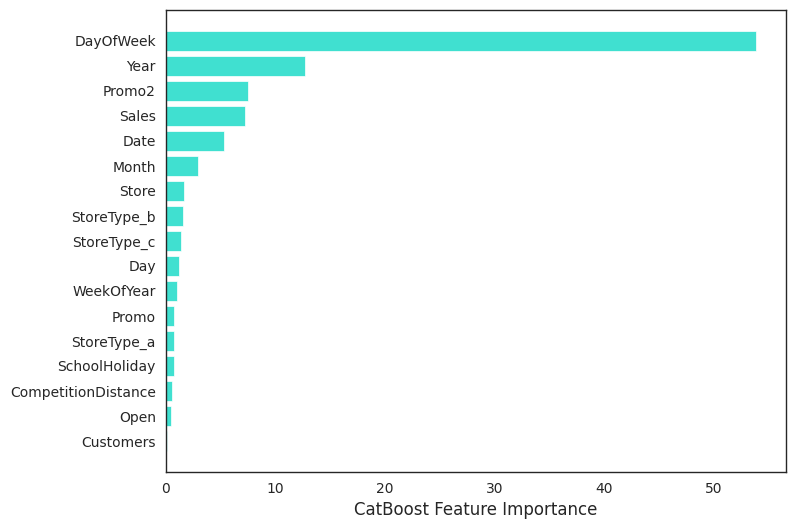

In [110]:
# Sort feature importances in ascending order
sorted_feature_importance = model.feature_importances_.argsort()

# Plot horizontal bar chart
plt.barh(df_new.columns[sorted_feature_importance],  # Names of features
         model.feature_importances_[sorted_feature_importance],  # Feature importances
         color='turquoise')  # Color of bars

# Set label for x-axis
plt.xlabel("CatBoost Feature Importance")


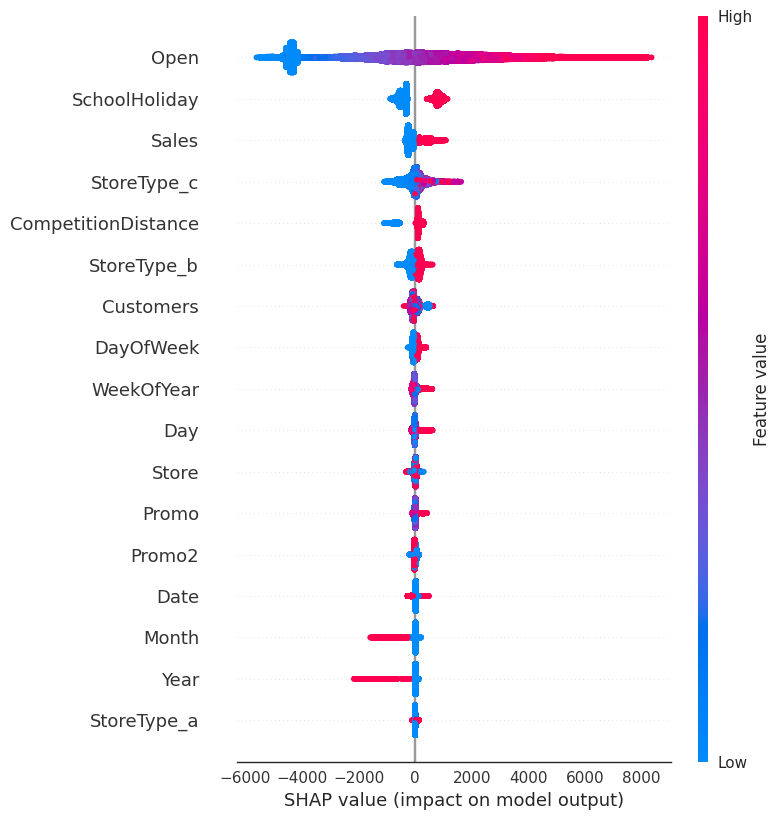

In [114]:
# Create a SHAP TreeExplainer object for the CatBoost model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# Generate a summary plot of SHAP values
shap.summary_plot(shap_values,  # SHAP values
                   X_test,  # Test dataset
                   feature_names=df_new.columns[sorted_feature_importance])  # Names of features


Inference:

The most important features are: DayofWeek, Yeat, Promo2, Sales, Sate and Month.

#**ML Model - 2**

#XGBOOST for regression


In [146]:
from sklearn.metrics import mean_squared_error as MSE
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [147]:
# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  881.555613


In [163]:
from sklearn.metrics import mean_squared_error as rmse, mean_absolute_percentage_error as mape

print("Testing MAPE", ":", mape(y_test,pred))

Testing MAPE : 1.2133413348411701e+17


In [148]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

Visualization

We can visualize individual trees using plot_tree (note: this requires the graphviz library to be installed).

In [149]:
# Importing necessary libraries

from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

# Set the plot size for displaying XGBoost tree

rcParams['figure.figsize'] = 30,30

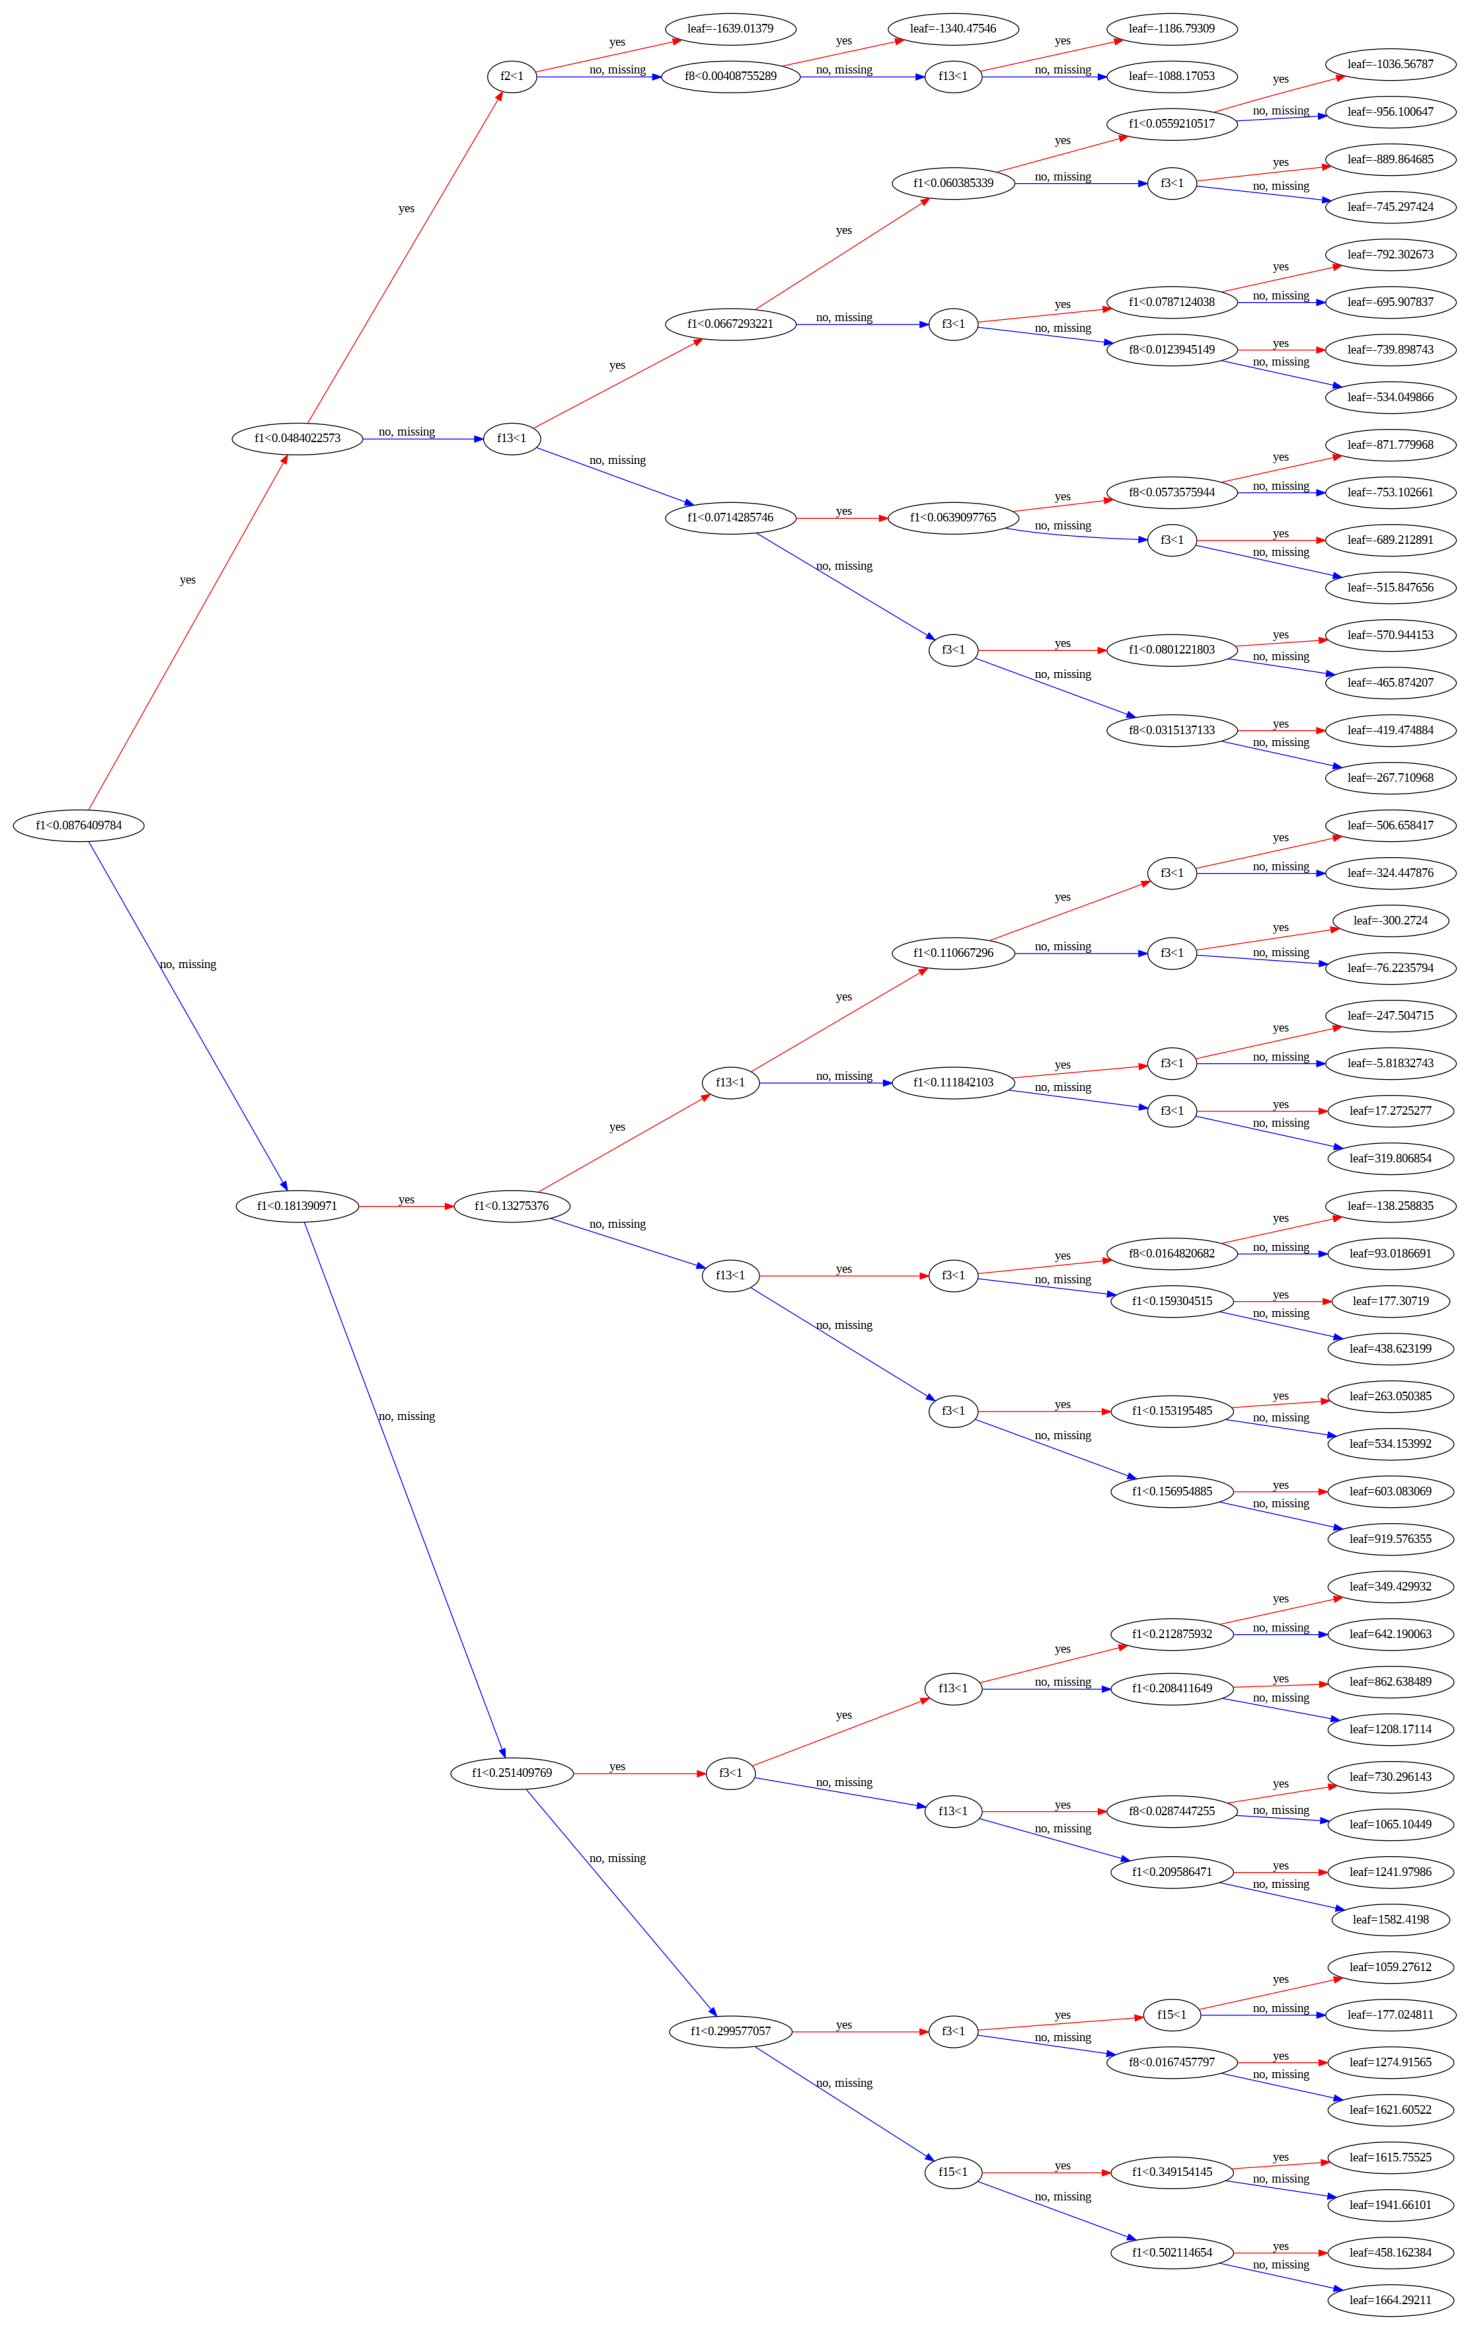

In [150]:
# Visualize the trained XGBoost model's tree with horizontal layout
plot_tree(xgb_r, rankdir='LR');

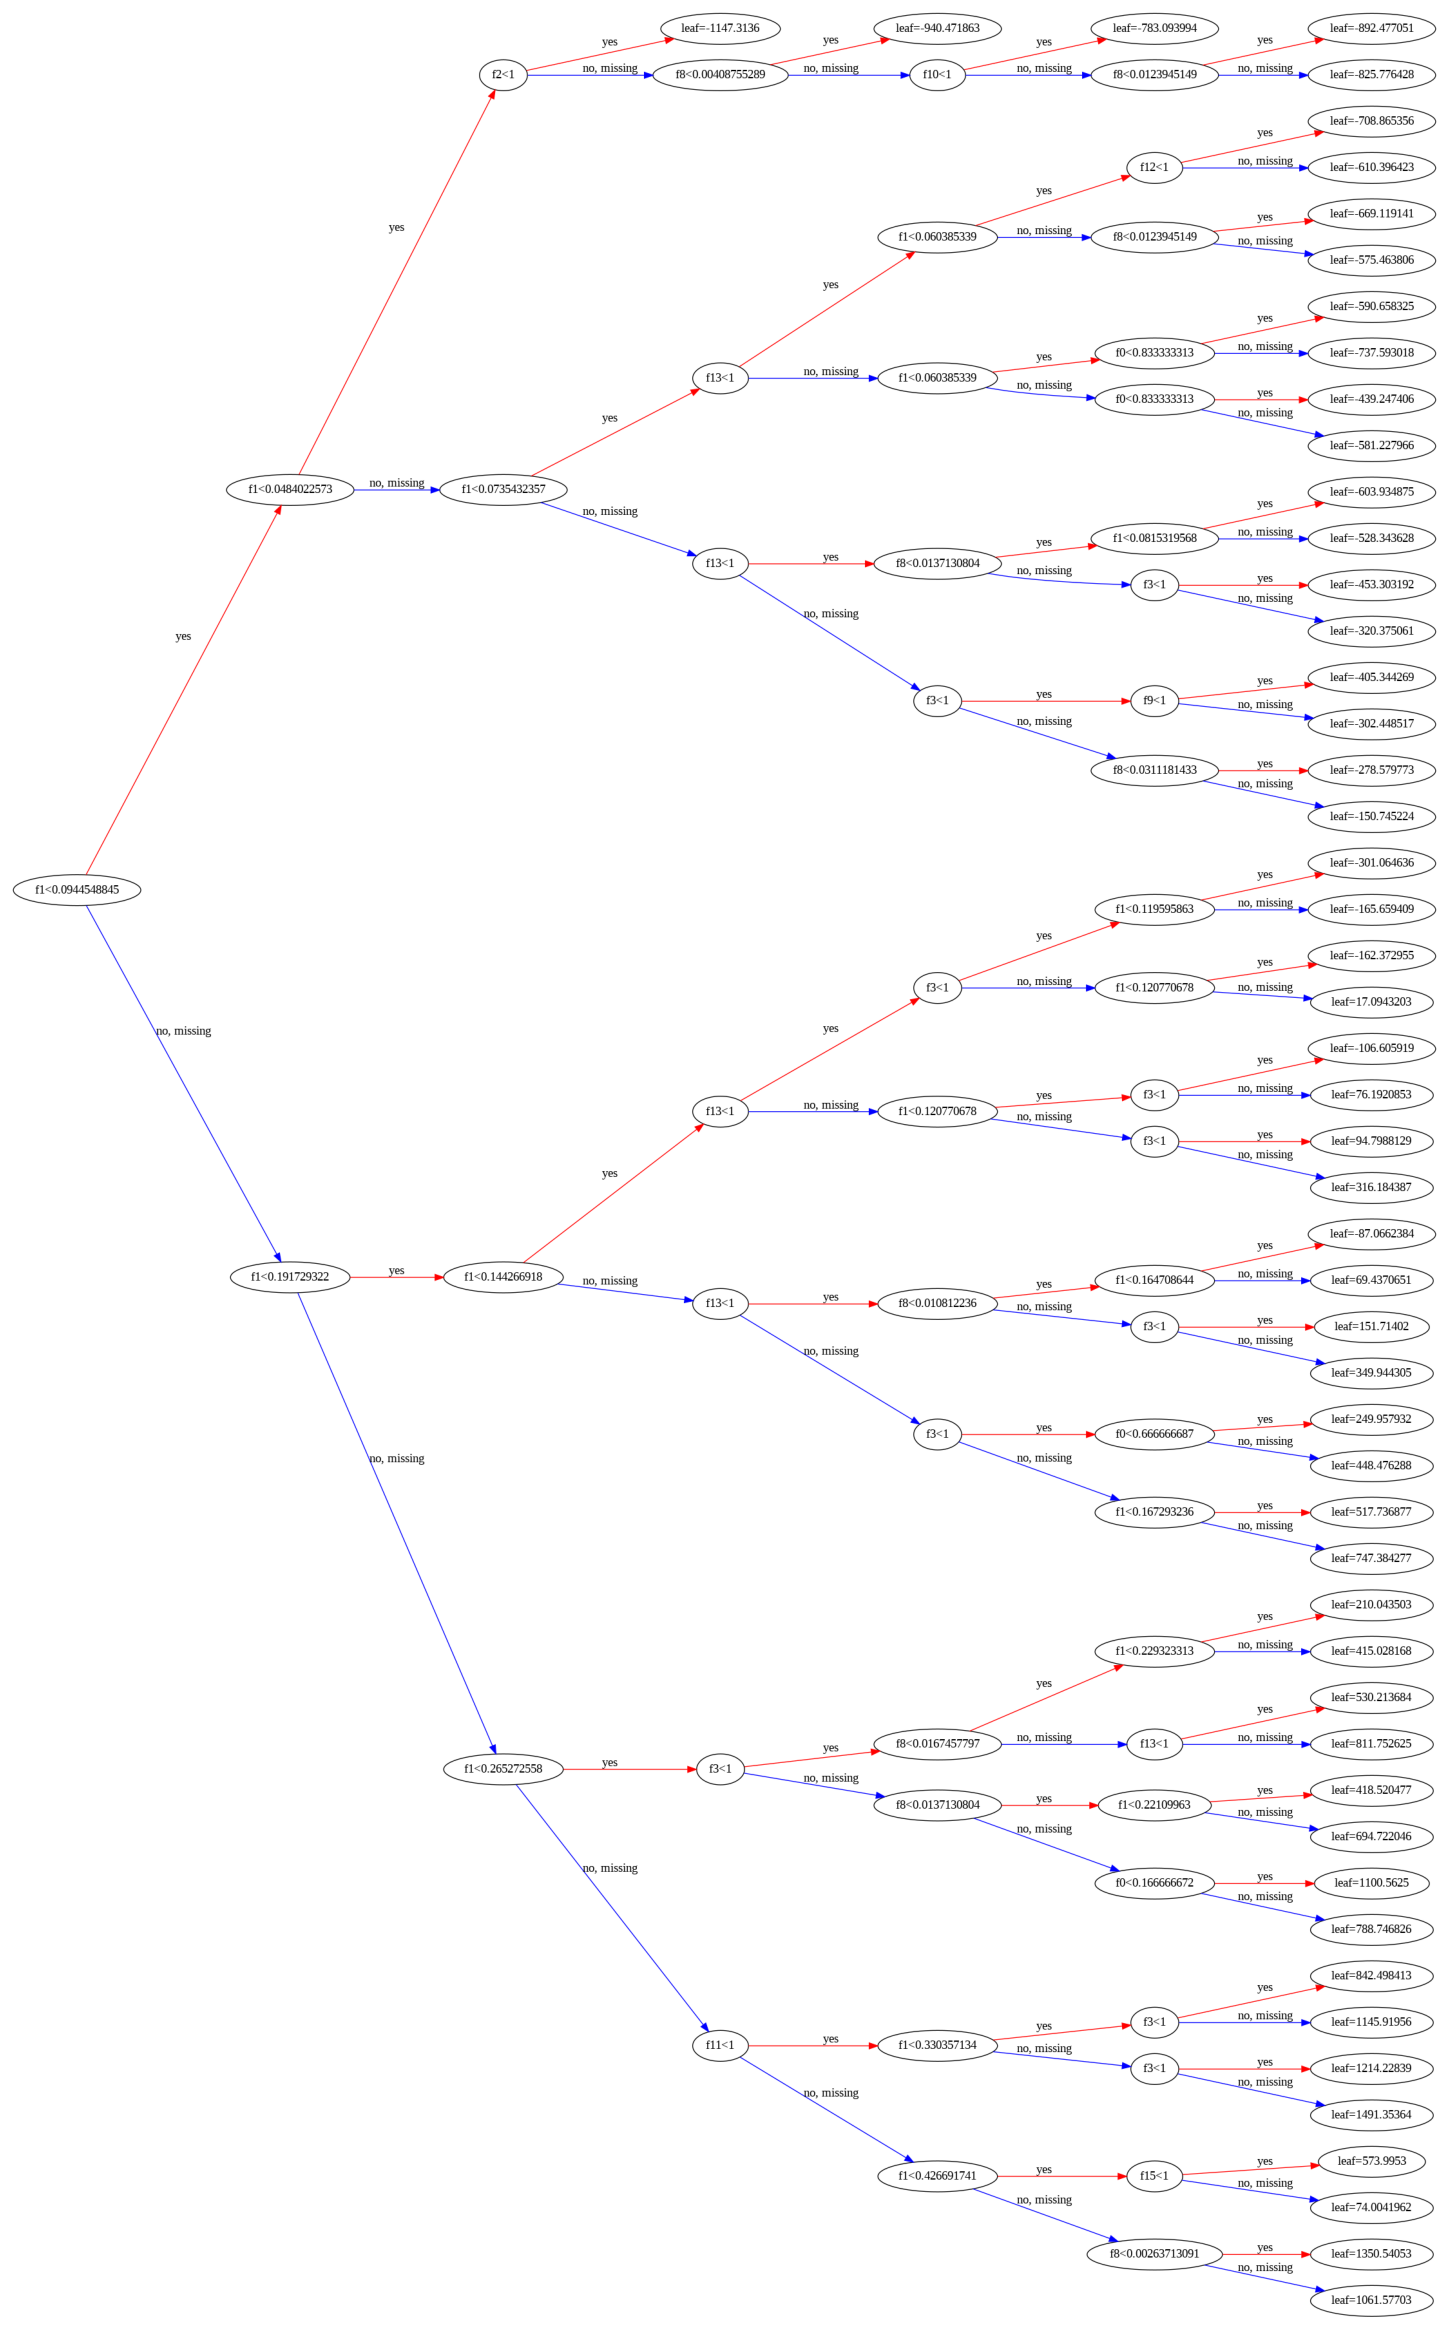

In [151]:
# Visualize the first tree of the trained XGBoost model with horizontal layout
plot_tree(xgb_r, rankdir='LR', num_trees=1);

In [152]:
# Retrieve the list of trees (in string format) from the trained XGBoost booster
trees = xgb_r.get_booster().get_dump()

In [153]:
# Get the number of trees in the XGBoost model by calculating the length of the list of trees

len(trees)

10

Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [154]:
# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({
    'feature': X.columns,  # Column names of the features
    'importance': xgb_r.feature_importances_  # Feature importances from the XGBoost model
}).sort_values('importance', ascending=False)  # Sort the DataFrame by importance values in descending order


In [155]:
# Display the top 10 features based on their importance in the XGBoost model
importance_df.head(10)

feature  importance
1             Customers    0.737482
13          StoreType_d    0.070107
3                 Promo    0.045162
15         Assortment_b    0.028470
11          StoreType_b    0.027765
0             DayOfWeek    0.013308
16         Assortment_c    0.012397
8   CompetitionDistance    0.010816
5                 Month    0.008754
9                Promo2    0.008330

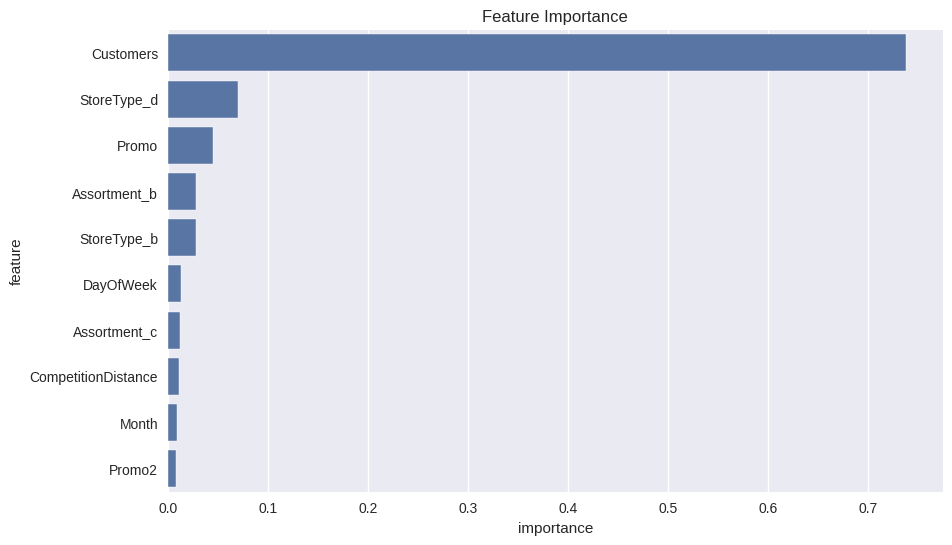

In [156]:
# Plotting the top 10 features based on their importance in the XGBoost model

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [157]:
from sklearn.model_selection import KFold

In [158]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [159]:
kfold = KFold(n_splits=5)

In [162]:
from xgboost import XGBRegressor
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], y.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], y.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train,
                                                     train_targets,
                                                     X_val,
                                                     val_targets,
                                                     max_depth=4,
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 863.1150464680426, Validation RMSE: 934.960020676584
Train RMSE: 878.27255261578, Validation RMSE: 875.3130602032514
Train RMSE: 876.9866387294628, Validation RMSE: 861.1400716313385
Train RMSE: 868.2219514968612, Validation RMSE: 886.6717624166994
Train RMSE: 873.8356776008561, Validation RMSE: 869.0474654877822


#**ML Model - 3**
DT

In [133]:
# Instantiate a DecisionTreeRegressor object
tree = DecisionTreeRegressor()

# Fit the Decision Tree regressor to the training data
treereg = tree.fit(X_train, y_train)


In [134]:
# Calculate the regression model score on the training and testing data
train_score_3 = treereg.score(X_train, y_train)
test_score_3 = treereg.score(X_test, y_test)

# Print the regression model scores
print("Regression Model Score:", train_score_3, ",", "Test Score:", test_score_3)

# Predict target variable for training and testing data
y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)

# Calculate and print RMSE for training and testing data
print("Training RMSE:", rmse(y_train, y_predicted), "Testing RMSE:", rmse(y_test, y_test_predicted))

# Calculate and print MAPE for training and testing data
print("Training MAPE:", mape(y_train, y_predicted), "Testing MAPE:", mape(y_test, y_test_predicted))


Regression Model Score: 0.999997724008862 , Test Score: 0.9617706011213562
Training RMSE: 25.824680541133034 Testing RMSE: 433523.4682665612
Training MAPE: 8.772445541931221e-06 Testing MAPE: 0.06347489513457004


### **Decision Tree With Hyper Parameter Tuning**

In [135]:
# #another script that takes toooo long, to find the right parameters for tree
tree = DecisionTreeRegressor()

params = {
          'min_samples_split':[2,3,5,7],
          'min_samples_leaf':[6,8,10],
          }

grid = RandomizedSearchCV(estimator=tree,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'min_samples_split': 3, 'min_samples_leaf': 6}

In [137]:
# Create a DecisionTreeRegressor with specified hyperparameters
tree = DecisionTreeRegressor(min_samples_leaf=6, min_samples_split=3)
# Fit the decision tree model to the training data
treereg = tree.fit(X_train, y_train)

In [138]:
# Calculate the regression model score on the training and testing data
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

# Print the regression model scores
print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

# Predict target variable for training and testing data
y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)

# Calculate and print RMSE for training and testing data
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# Calculate and print MAPE for training and testing data
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9865343778989818 , Test Score : 0.9710055624164123
Training RMSE : 152788.5514305222 Testing RMSE : 328798.5035175931
Training MAPE : 1630326967909.9143 Testing MAPE : 0.05529432765407216


In [139]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe


In [140]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

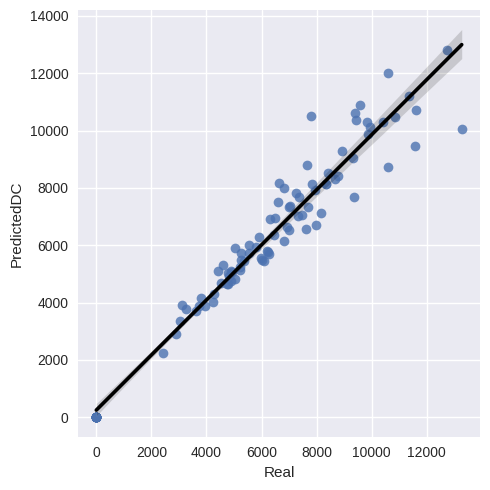

In [141]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});


#**ML Model - 4**

**Random forest regression with hyperparameter tuning**

In [116]:
# Create an instance of the RandomForestRegressor class
rdf = RandomForestRegressor()
# Fit the RandomForestRegressor model to the training data
# X_train: Features for training the model
# y_train: Target variable for training the model
rdfreg = rdf.fit(X_train, y_train)

In [120]:
from sklearn.metrics import mean_squared_error as rmse, mean_absolute_percentage_error as mape

# Calculate and print the regression model scores for training and testing data
train_score_5=rdfreg.score(X_train, y_train)
test_score_5=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)

# Make predictions on the training and testing data
y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))

print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

Regresion Model Score : 0.9972766871909435 , Test Score : 0.9804165851280711
Training RMSE : 30900.24479124977 Testing RMSE : 222076.99270218753
Training MAPE : 42999061862.8198 Testing MAPE : 0.046703821664246886


In [121]:
# Compute the predicted target values for the testing dataset using the trained Random Forest regressor model
y_test_predicted_2
'''
Here,  y_test_predicted_2 represents the predicted target values generated by the Random Forest
regressor model (rdfreg) for the testing dataset (X_test). These predicted values are computed using
 the trained model and are compared against the actual
target values (y_test) to evaluate the model's performance using metrics such as RMSE and MAPE.'''

"\nHere,  y_test_predicted_2 represents the predicted target values generated by the Random Forest \nregressor model (rdfreg) for the testing dataset (X_test). These predicted values are computed using\n the trained model and are compared against the actual \ntarget values (y_test) to evaluate the model's performance using metrics such as RMSE and MAPE."

In [122]:
#%%time
# Initialize a Random Forest regressor with specified hyperparameters
# n_estimators: The number of trees in the forest
# min_samples_split: The minimum number of samples required to split an internal node
# min_samples_leaf: The minimum number of samples required to be at a leaf node
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
# n_jobs: The number of jobs to run in parallel for both fit and predict (-1 means using all processors)

rdf = RandomForestRegressor(n_estimators=50,min_samples_split=6, min_samples_leaf=1,max_depth=None,n_jobs=-1)

# Fit the Random Forest regressor to the training dataset
rdfreg = rdf.fit(X_train, y_train)

In [123]:
# Calculate the R^2 score for the Random Forest regressor on the training dataset
train_score_5=rdfreg.score(X_train, y_train)

# Calculate the R^2 score for the Random Forest regressor on the testing dataset
test_score_5=rdfreg.score(X_test, y_test)

# Print the regression model scores
print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)

# Predict the target variable for the training dataset using the trained model
y_predicted_2 = rdfreg.predict(X_train)

# Predict the target variable for the testing dataset using the trained model
y_test_predicted_2 = rdfreg.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for the training and testing datasets
print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))

# Calculate the Mean Absolute Percentage Error (MAPE) for the training and testing datasets
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

Regresion Model Score : 0.9945662093429735 , Test Score : 0.9802896464962608
Training RMSE : 61654.85686702938 Testing RMSE : 223516.48370998644
Training MAPE : 29878502200.763332 Testing MAPE : 0.04680188350400235


In [124]:
y_test_predicted_2

array([ 6336.98258153,     0.        ,  2866.64985786, ...,
       10520.69370635,  4351.38688889,  6668.05873016])

In [125]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [126]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [127]:
# taking 4 sample
dataset_rf.sample(4)

Real   PredictedRF        diff
311267      0      0.000000    0.000000
475264  11353  11564.716317  211.716317
525947   7989   7572.001056  416.998944
932901      0      0.000000    0.000000

In [128]:
#Statistical description of our predictions and actual values
dataset_rf.describe()

Real   PredictedRF         diff
count    100.000000    100.000000   100.000000
mean    5788.240000   5815.457558   330.394415
std     3369.997372   3289.711311   359.513792
min        0.000000      0.000000     0.000000
25%     4171.250000   4247.507501    91.965036
50%     6037.500000   6134.938212   270.558274
75%     7952.250000   8116.733636   437.852272
max    13269.000000  12541.908730  2508.897667

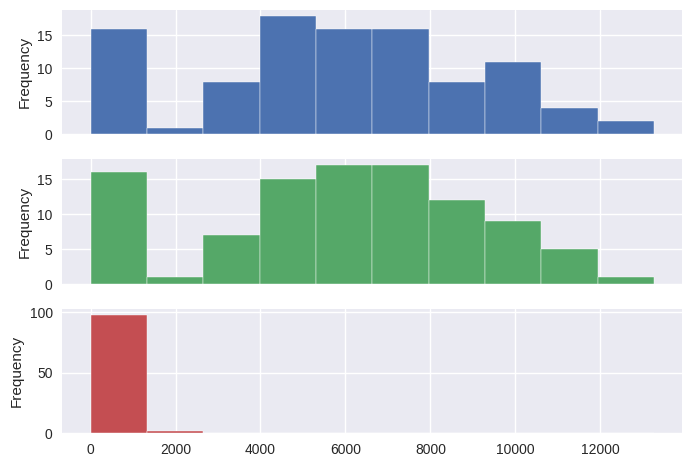

In [129]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False);

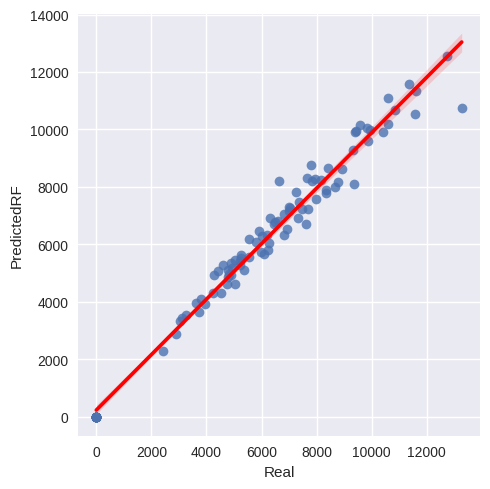

In [130]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, aspect=1);

##Feature Importance On Random Forest Regressor

In [131]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

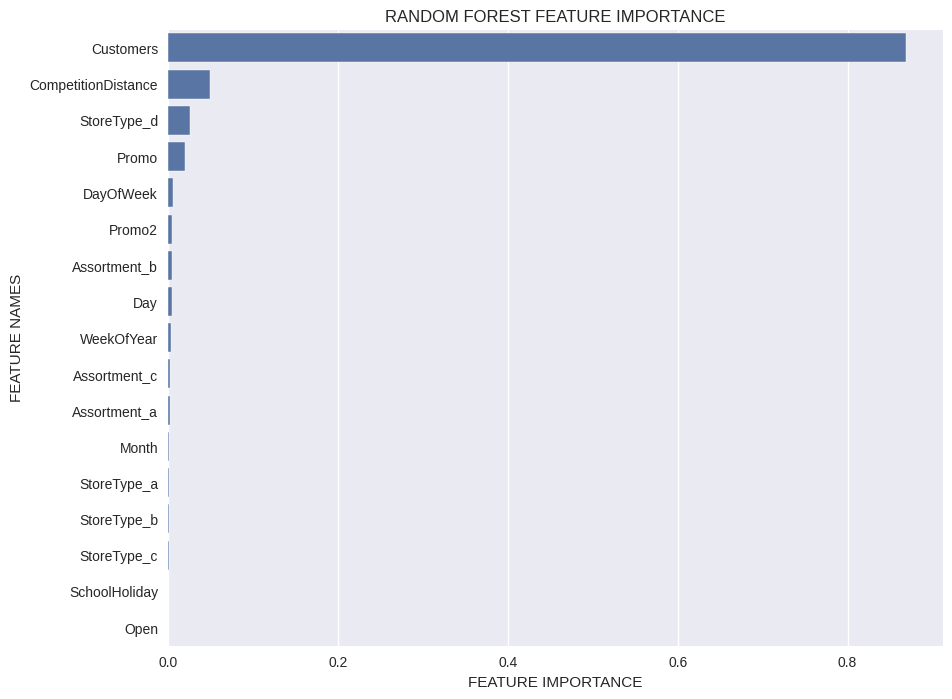

In [132]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

Inference

Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.

**Sales prediction**

In [178]:
def predict_avg(models, inputs):
    """ This function predicts the average output from a list of models for a given input.
    I/P args:
    - models (list): List of regression models.
    - inputs (numpy array): Input data for prediction.
    O/P args:
    - numpy array: Average predictions from the list of models.
    """
    return np.mean([model.predict(inputs) for model in models], axis=0)

# Predict using the average of all models
preds = predict_avg(models, X_train)
preds

array([ 5191.95  ,  6134.79  ,  9030.698 , ...,  7990.2056, 11170.398 ,
        9168.096 ], dtype=float32)

# **Conclusion**

In [166]:

# Create a dictionary to store model names and errors
model_errors = {
    'Model': ['Catboost Regression', 'XGBOOST for regression', 'DT', 'Random forest'],
    'Testing RMSE': [722.04, 863.115, 328798.504, 222076.993],
    'Testing MAPE': [6.214370711490374e+16, 1.2133413348411701e+17, 0.05529432765407216, 0.046703821664246886]
}

# Create a DataFrame from the dictionary
errors_df = pd.DataFrame(model_errors)

# Display the DataFrame
print(errors_df)


                    Model  Testing RMSE  Testing MAPE
0     Catboost Regression       722.040  6.214371e+16
1  XGBOOST for regression       863.115  1.213341e+17
2                      DT    328798.504  5.529433e-02
3           Random forest    222076.993  4.670382e-02


## **Conclusions:**

Based on the insights gathered from the analysis of the dataset, we can draw the following conclusions:

1. **Store Operations:**
   - The store is typically open most of the time, with Sunday being the day it's closed the most.
   - There are very few school holidays and even fewer state holidays observed in the dataset.

2. **Sales Trends:**
   - Sales show a linear relationship with the number of customers, which is expected.
   - Sales see a significant increase when promotional activities are conducted, with roughly a two-fold increase during promotions.
   - Sales peak during the months of December and November (due to Christmas), followed by July and March, while sales are lowest in January, May, and October.
   - The majority of sales (82.1%) are not affected by school holidays, and only a small percentage (3.1%) is impacted by state holidays.
   - Overall, there isn't a significant difference in sales across the three years covered in the dataset.

3. **Correlations:**
   - There is a high correlation (0.89) between sales and the number of customers, which is intuitive.
   - Moderate correlations are observed between sales and whether the store is open (0.68) and between sales and promotional activities (0.45).

4. **Store Types:**
   - Store Type C has the highest number of stores, with more Type A and Type C assortments.
   - Store Type D has more Type C assortments than Type A assortments.
   - Store Type B, while having fewer stores, has the highest average number of customers and sales.

5. **Promotional Impact:**
   - Promotions (both Promo and Promo2) lead to a significant increase in sales, with Promo being more effective than Promo2.
   - Sales are consistently higher with promotions, regardless of the year.

6. **Weekly Sales Patterns:**
   - Negligible sales are observed on Sundays when the store is closed.
   - Sales with promotions are highest on Mondays and gradually decrease throughout the week.
   - Promo activities are typically conducted during the first five days of the week, resulting in higher sales during this period.

7. **Competitor Impact:**
   - Stores tend to perform better (in terms of both sales and customers) when competitor stores are located far away.
8. **Sales Patterns:**
   After performing hypothesis testing, it can be seen that sales are significantly higher after the 10th day of each month. Also, stores sell more in the second half of the year and Promo2 affects the sales.
9. **Machine Learning Analysis:**
Analysis after applying various machine learning models for regression: Catboost regression gives the lowest RMSE while Random Forest gives the lowest MAPE.

These conclusions provide valuable insights into the sales trends, promotional impact, store operations, and competitor influence, which can inform strategic decision-making for the business.



#References:


[1.]   https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329

[2.]   https://www.geeksforgeeks.org/xgboost-for-regression/


